In [53]:
using TCI4Keldysh
using PythonCall
using PythonPlot
using LaTeXStrings

INCH_TO_PT = 72.27
PT_TO_INCH = 1.0/INCH_TO_PT
# COLUMN_PT = 432
# COLUMN_INCH = COLUMN_PT*PT_TO_INCH
PLOT_COLUMN_PT = 246
PLOT_COLUMN_INCH = PLOT_COLUMN_PT*PT_TO_INCH
PLOT_PAGE_PT = 510
PLOT_PAGE_INCH = PLOT_PAGE_PT*PT_TO_INCH

# previous values
COLUMN_PT_OLD = 432
PT_TO_INCH_OLD = 1.0/INCH_TO_PT_OLD
COLUMN_INCH_OLD = COLUMN_PT_OLD*PT_TO_INCH_OLD 
INCH_TO_PT_OLD = 72
PLOT_COLUMN_PT_OLD = 420
PLOT_COLUMN_INCH_OLD = PLOT_COLUMN_PT_OLD*PT_TO_INCH_OLD 
PLOT_PAGE_PT_OLD = 2*PLOT_COLUMN_PT_OLD
PLOT_PAGE_INCH_OLD = PLOT_PAGE_PT_OLD*PT_TO_INCH_OLD 

function set_rcParams(fs::Int=12)
    pyplot.rcParams["font.size"] = fs        # Title font size
    # pyplot.rcParams["axes.labelsize"] = fs               # Axis label font size
    pyplot.rcParams["xtick.labelsize"] = fs             # X-axis tick label font size
    pyplot.rcParams["ytick.labelsize"] = fs             # Y-axis tick label font size
    pyplot.rcParams["legend.fontsize"] = fs             # Legend font size
end
set_rcParams(12)

function annotate_topleft(ax, text; color="black", fontsize=14)
    subplotlabeloffset=3
    ax.annotate(
    text,
    xy=(0,1),
    xycoords="axes fraction",
    horizontalalignment="left",
    verticalalignment="top",
    xytext=(+subplotlabeloffset, -subplotlabeloffset),
    textcoords="offset points",
    color=color,
    fontsize=fontsize
    )
end

function annotate_bottomleft(ax, text; color="black", fontsize=14)
    subplotlabeloffset=3
    ax.annotate(
    text,
    xy=(0,0),
    xycoords="axes fraction",
    horizontalalignment="left",
    verticalalignment="bottom",
    xytext=(+subplotlabeloffset, +subplotlabeloffset),
    textcoords="offset points",
    color=color,
    fontsize=fontsize
    )
end


function annotate_topright(ax, text; color="black", fontsize=14)
    subplotlabeloffset=3
    ax.annotate(
    text,
    xy=(1,1),
    xycoords="axes fraction",
    horizontalalignment="right",
    verticalalignment="top",
    xytext=(-subplotlabeloffset, -subplotlabeloffset),
    textcoords="offset points",
    color=color,
    fontsize=fontsize
    )
end

function annotate_bottomright(ax, text; color="black", fontsize=14)
    subplotlabeloffset=3
    ax.annotate(
    text,
    xy=(1,0),
    xycoords="axes fraction",
    horizontalalignment="right",
    verticalalignment="bottom",
    xytext=(-subplotlabeloffset, +subplotlabeloffset),
    textcoords="offset points",
    color=color,
    fontsize=fontsize
    )
end

"""
legend with one column, labels for colors and markers
"""
function onecol_legend_colormarker(colors, markers, collabels, markerlabels)
    @assert length(colors)>=length(collabels)
    @assert length(markers)>=length(markerlabels)

    mlines = pyimport("matplotlib.lines")
    collines = [mlines.Line2D([], [], color=colors[j], label=collabels[j]) for j in eachindex(collabels)]
    markerlines = [mlines.Line2D([], [], color="black", marker=markers[j], label=markerlabels[j], linestyle="None") for j in eachindex(markerlabels)]

    handles = vcat(collines, markerlines)
    return handles
end

"""
tabular legend with same markers in columns and same colors in rows
"""
function table_legend_colormarker(colors, markers, coltitles, rowtitles, uppercorner="")
    @assert length(colors)>=length(rowtitles)
    @assert length(markers)>=length(coltitles)

    mlines = pyimport("matplotlib.lines")
    # does not work
    # mtext = pyimport("matplotlib.text")
    firstcol = [mlines.Line2D([], [], color="none", label=uppercorner)]
    firstcol = vcat(firstcol, [mlines.Line2D([], [], color="none", label=rt) for rt in rowtitles])
    lines = [mlines.Line2D([], [], color=colors[i], marker=markers[j]) for j in eachindex(coltitles) for i in eachindex(rowtitles)]

    clabels = [mlines.Line2D([], [], color="none", label=ct) for ct in coltitles]
    nrows = length(rowtitles)
    for i in eachindex(clabels)
        insert!(lines, (i-1)*nrows + i, clabels[i])
    end

    handles = vcat(firstcol, lines)
    return handles
end

"""
Save figure including a legend outside the figure (bbox_to_anchor with entries > 1.0)
"""
function save_bbox(name::String, fig, lgd)
    fig.savefig(
        name,
        bbox_extra_artists=(lgd,),
        bbox_inches="tight"
        )
end

function abc_annotate(axs; color="black", yoff=nothing, xoff=nothing, kwargs...)
    subplotlabeloffset=3
    alphabet = "abcdefghijklmnopqrstuvwxyz"
    naxs = length(axs.flatten())
    for i in 0:naxs-1
        axs.flatten()[i].annotate(
        "($(alphabet[i+1]))",
        xy=(1,1),
        xycoords="axes fraction",
        horizontalalignment="right",
        verticalalignment="top",
        xytext=(-(isnothing(xoff) ? subplotlabeloffset : xoff), -(isnothing(yoff) ? subplotlabeloffset : yoff)),
        textcoords="offset points",
        color=color,
        kwargs...
        )
    end
end

function remove_ticks(ax)
    ax.tick_params(
        axis="both",
        which="both",
        labelbottom=false,
        labelleft=false,
        bottom=false,
        left=false
    )
end

function center_ticks(ax)
    ticks = ax.xaxis.get_majorticklabels()
    ticks[0].set_horizontalalignment("left")
    nticks = length(ticks)
    ticks[nticks-1].set_horizontalalignment("right")
end

center_ticks (generic function with 1 method)

In [44]:
pyplot.rcParams["font.family"] = "serif"
pyplot.rcParams["font.serif"] = ["Computer Modern Roman", "Times", "DejaVu Serif"]
pyplot.rcParams["mathtext.fontset"] = "cm"
@show pyplot.rcParams["font.family"]
@show pyplot.rcParams["font.serif"]
@show pyplot.rcParams["mathtext.fontset"]

pyplot.rcParams["font.family"] = <py ['serif']>
pyplot.rcParams["font.serif"] = <py ['Computer Modern Roman', 'Times', 'DejaVu Serif']>
pyplot.rcParams["mathtext.fontset"] = <py 'cm'>


Python: 'cm'

In [49]:
function to_intvec(x) :: Vector{Int}
    return convert(Vector{Int}, x)
end

function onlyJSON(path::AbstractString)
    list = filter(f -> endswith(f, ".json"), readdir(path; join=true))
    if isempty(list)
        error("No JSON found in $path")
    end
    return only(list) 
end

function Rrank(folder::AbstractString, R::Int)
    d = TCI4Keldysh.readJSON(onlyJSON(folder))
    return Rrank(d, R)
end

function Rrank_file(file::AbstractString, R::Int)
    d = TCI4Keldysh.readJSON(file)
    return Rrank(d, R)
end

function Rrank(d::Dict, R::Int)
    Rs = d["Rs"]
    Rid = findfirst(isequal(R), Rs)
    return d["ranks"][Rid]
end

function Rbonddim(d::Dict, R::Int)
    Rs = d["Rs"]
    Rid = findfirst(isequal(R), Rs)
    return d["bonddims"][Rid]
end

function Rbonddim(folder::AbstractString, R::Int)
    d = TCI4Keldysh.readJSON(onlyJSON(folder))
    return Rbonddim(d, R)
end

function Rbonddim_file(file::AbstractString, R::Int)
    d = TCI4Keldysh.readJSON(file)
    return Rbonddim(d, R)
end

function join_data(folders::Vararg{AbstractString,N}) where N
    return join_data_file(onlyJSON.(folders)...)
end

function join_data_file(jsonfiles::Vararg{AbstractString,N}) where N
    Rs_all = []
    bonddims_out = []
    ranks_out = []
    times_out = []
    for file in jsonfiles    
        d = TCI4Keldysh.readJSON(file)
        Rs = d["Rs"]
        nfinish = length(d["ranks"])
        append!(ranks_out, d["ranks"])
        append!(bonddims_out, d["bonddims"])
        append!(times_out, d["times"])
        append!(Rs_all, Rs[1:nfinish])
    end
    d = Dict()
    d["Rs"] = to_intvec(Rs_all)
    d["bonddims"] = to_intvec.(bonddims_out)
    d["ranks"] = to_intvec(ranks_out)
    d["times"] = times_out
    return d
end

basepath = joinpath(TCI4Keldysh.pdatadir(), "cluster_output")
kcspath = joinpath(TCI4Keldysh.pdatadir(), "cluster_output_KCS")

"/scratch/m/M.Frankenbach/tci4keldysh/cluster_output_KCS"

In [35]:
# load Matsubara data
d1 = TCI4Keldysh.readJSON(onlyJSON(joinpath(basepath, "gamcoreMF_pch_tol3_beta20")), basepath)
d2 = TCI4Keldysh.readJSON(onlyJSON(joinpath(basepath, "gamcoreMF_pch_tol3_beta200")), basepath)
d3 = TCI4Keldysh.readJSON(onlyJSON(joinpath(basepath, "gamcoreMF_pch_tol3_beta2000")), basepath)

f1 = TCI4Keldysh.readJSON(onlyJSON(joinpath(basepath, "fullvertexMF_pch_tol3_beta20")), basepath)
f2 = TCI4Keldysh.readJSON(onlyJSON(joinpath(basepath, "fullvertexMF_pch_tol3_beta200")), basepath)
f3 = TCI4Keldysh.readJSON(onlyJSON(joinpath(basepath, "fullvertexMF_pch_tol3_beta2000")), basepath)

Dict{String, Any} with 12 entries:
  "flavor_idx" => 1
  "times"      => Any[12905.5]
  "ranks"      => Any[86]
  "tcikwargs"  => Dict{String, Any}()
  "numthreads" => 64
  "bonddims"   => Any[Any[2, 4, 8, 16, 32, 44, 58, 62, 48, 68  …  61, 47, 48, 4…
  "Rs"         => Any[10]
  "PSFpath"    => "/scratch/m/M.Frankenbach/tci4keldysh/data/SIAM_u=0.50/PSF_nz…
  "beta"       => 2000.0
  "channel"    => "p"
  "job_id"     => "3742085"
  "tolerance"  => 0.001

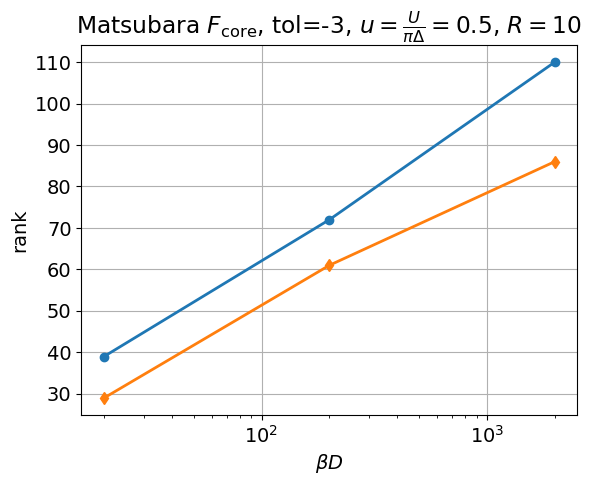

In [23]:
# plot Matsubara core vertex rank for different temperatures
Rs = d1["Rs"]
betas = [20.0, 200.0, 2000.0]
ranks20 = d1["ranks"]
ranks200 = d2["ranks"]
ranks2000 = d3["ranks"]
fullranks20 = f1["ranks"]
fullranks200 = f2["ranks"]
fullranks2000 = f3["ranks"]
betaranks = [d[6] for d in [ranks20,ranks200,ranks2000]]
betafullranks = [only(d) for d in [fullranks20,fullranks200,fullranks2000]]

fig, ax = subplots()
ax.plot(betas, betaranks; label=L"$F_{\mathrm{core}}$", marker="o", linewidth=2)
ax.plot(betas, betafullranks; label=L"F_{\mathrm{full}}", marker="d", linewidth=2)
ax.set_xscale("log")
# plot!(p, Rs, ranks200; label=L"\beta*\Delta=200")
# plot!(p, Rs, ranks2000; label=L"\beta\Delta=2000")
ax.set_title(L"Matsubara $F_{\mathrm{core}}$, tol=-3, $u=\frac{U}{\pi\Delta}=0.5$, $R=10$")
# D: bandwidth
ax.set_xlabel(L"\beta D")
ax.set_ylabel("rank")
ax.grid(true)
savefig("betavsrank.pdf")
display(fig)

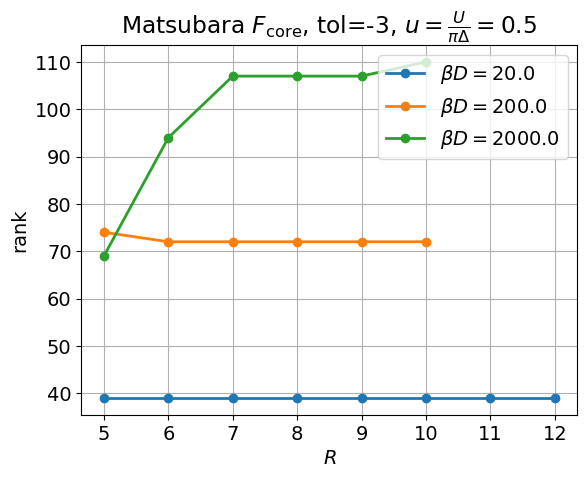

In [26]:
fig, ax = subplots()
for d in [d1,d2,d3]
    ranks = d["ranks"]
    beta = d["beta"]
    ax.plot(d["Rs"][1:length(ranks)], ranks; label=L"\beta D=%$beta", linewidth=2, marker="o")
end
ax.set_xlabel(L"R")
ax.set_ylabel("rank")
ax.set_title(L"Matsubara $F_{\mathrm{core}}$, tol=-3, $u=\frac{U}{\pi\Delta}=0.5$")
ax.grid(true)
ax.legend()
savefig("betaRvsrank.pdf")
display(fig)

### Matsubara triptych

Collect data

In [55]:
using HDF5
R = 8
slice_shift = 1
folder_triptych = joinpath(TCI4Keldysh.pdatadir(), "cluster_output")
# h5file2 = "matsubaraslice_u0.5/V_MF_dim1_slice$(slice_shift)_R$(R).h5"
# h5file3 = "matsubaraslice_u0.5_updown/V_MF_dim1_slice$(slice_shift)_R$(R).h5"
h5file2 = "matsubaraslice_center/V_MF_dim1_slice$(slice_shift)_R$(R).h5"
h5file3 = "matsubaraslice_center_updown/V_MF_dim1_slice$(slice_shift)_R$(R).h5"
h5files = [h5file2, h5file3]

2-element Vector{String}:
 "matsubaraslice_center/V_MF_dim1_slice1_R8.h5"
 "matsubaraslice_center_updown/V_MF_dim1_slice1_R8.h5"

In [56]:
# qtt dat
using Serialization
import QuanticsGrids as QG
qttfile2 = joinpath(TCI4Keldysh.pdatadir(), "cluster_output", "gamcoreMF_pch_tol3_beta2000", "gammacore_timing_R_min=5_max=12_tol=-3_beta=2000.0_R=$(R)_qtt.serialized")
qttfile3 = joinpath(TCI4Keldysh.pdatadir(), "cluster_output", "gamcoreMF_pch_tol3_beta2000_updown", "gammacore_timing_R_min=5_max=12_tol=-3_beta=2000.0_R=$(R)_qtt.serialized")
tci2, _ = deserialize(qttfile2)
tci3, _ = deserialize(qttfile3)

function get_qttslice_interleaved(tci)
    bit_val = fill(0, R)
    slice_idx = 2^(R-1) + slice_shift
    QG.index_to_quantics_fused!(bit_val, (slice_idx,))
    @show bit_val

    # ω=const
    ttslice = TCI4Keldysh.saturate_bits(tci.sitetensors, collect(1:3:3*R), bit_val)
    @show size.(ttslice)
    slice_fat_q = TCI4Keldysh.qtt_to_fattensor(ttslice)
    slice_fat = TCI4Keldysh.qinterleaved_fattensor_to_regular(reshape(slice_fat_q, ntuple(_->2, 2*R)), R)
    @show size(slice_fat)
    return slice_fat
end

qttdata2 = get_qttslice_interleaved(tci2)
qttdata3 = get_qttslice_interleaved(tci3)
qttvals_ = [qttdata2, qttdata3]

# saturate bits and contract

bit_val = [2, 1, 1, 1, 1, 1, 1, 1]
size.(ttslice) = [(1, 2, 4), (4, 2, 8), (8, 2, 32), (32, 2, 57), (57, 2, 107), (107, 2, 89), (89, 2, 106), (106, 2, 84), (84, 2, 89), (89, 2, 64), (64, 2, 58), (58, 2, 42), (42, 2, 16), (16, 2, 8), (8, 2, 2), (2, 2, 1)]
size(slice_fat) = (256, 256)
bit_val = [2, 1, 1, 1, 1, 1, 1, 1]
size.(ttslice) = [(1, 2, 4), (4, 2, 8), (8, 2, 32), (32, 2, 58), (58, 2, 103), (103, 2, 91), (91, 2, 106), (106, 2, 85), (85, 2, 90), (90, 2, 67), (67, 2, 65), (65, 2, 48), (48, 2, 16), (16, 2, 8), (8, 2, 2), (2, 2, 1)]
size(slice_fat) = (256, 256)


2-element Vector{Matrix{ComplexF64}}:
 [6.285282641639616e-6 - 2.6911751871468238e-9im 5.886556079864493e-6 - 7.933328618006952e-9im … -5.934492526699487e-6 + 4.380670415677241e-9im -6.395222420808102e-6 + 2.1099542119243634e-20im; 5.890482412203804e-6 - 2.2776132192468866e-9im 6.454917300447483e-6 - 6.286610834497796e-9im … -6.508405967253912e-6 + 1.4114749848227419e-9im -6.022967038054454e-6 + 9.299451617359311e-10im; … ; -5.8348193949742025e-6 + 5.15275891635977e-10im -6.366013629954042e-6 + 8.8870641108096e-9im … 6.605514737078636e-6 + 4.56119231612163e-9im 6.038652952440501e-6 + 2.2098089208796263e-9im; -6.395222420808102e-6 + 3.2279927728218463e-21im -5.940852086465648e-6 - 3.3169840622132585e-10im … 5.981611873245681e-6 + 2.0836049155306473e-9im 6.395222420808011e-6 + 1.0896889648861452e-20im]
 [-1.8728223844929668e-6 - 3.721705221445245e-9im -2.830282058722878e-6 + 9.156649053516959e-9im … -8.86880684335464e-6 + 2.177424034744552e-9im -8.602290870334852e-6 + 2.168238133366674e-

In [57]:
# reference data
refvals_ = [h5read(joinpath(folder_triptych, f), "V_MF") for f in h5files]
# maxrefs = [h5read(joinpath(folder_triptych, f), "maxref") for f in h5files]
@show size.(refvals_)
diffs_ = [abs.(refvals_[i] .- qttvals_[i]) for i in eachindex(refvals_)]
# maxrefs = [maximum(abs.(refvals_[i])) for i in eachindex(refvals_)]
maxrefs = [tci2.maxsamplevalue, tci3.maxsamplevalue]
diffs_ = [diffs_[i] ./ maxrefs[i] for i in eachindex(refvals_)]


size.(refvals_) = [(256, 256), (256, 256)]


2-element Vector{Matrix{Float64}}:
 [6.062727730610909e-5 6.508463039638788e-5 … 3.867890392210845e-5 2.1224025417794e-7; 6.280104090715372e-5 5.6160441682382005e-5 … 2.6680645978018196e-5 1.0006820280801726e-5; … ; 9.336828774026746e-5 0.00010500822447970332 … 2.6796147931695772e-5 1.8650606776975652e-5; 2.1224025408859668e-7 3.511071970988246e-5 … 1.2769674737210719e-5 2.1224025407929011e-7]
 [0.00015643119991748855 5.898527154785269e-6 … 1.2119102226122675e-5 2.331548116463358e-6; 9.271535073648002e-5 0.0004692851319163598 … 3.451975777894666e-5 7.280558981564903e-5; … ; 0.00013162720945961303 0.00020740446728074617 … 2.49660590234152e-5 2.3230439020544347e-5; 4.492842128215387e-5 8.684566285756139e-5 … 1.1764646729722218e-5 2.515254556308431e-6]

In [66]:
@show maxrefs

maxrefs = [0.0018202851881338428, 0.002103017135822013]


2-element Vector{Float64}:
 0.0018202851881338428
 0.002103017135822013

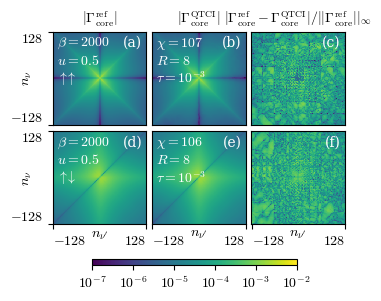

axs = Py[<Axes: > <Axes: > <Axes: >; <Axes: > <Axes: > <Axes: >]
size(axs) = (2, 3)
xvals = -129:128


In [60]:

nrows = length(h5files)
# fontsize
set_rcParams(10)
fs = 10

globalcbar = true
vmin = -7
vmax = -2

# eliminate singleton dims
# dvecs_ = [refvals_, qttvals_, diffs_]
# @show size.(refvals_)
# @show size.(qttvals_)
# @show size.(diffs_)
# refvals = Vector{Matrix{ComplexF64}}(undef, nrows)
# qttvals = Vector{Matrix{ComplexF64}}(undef, nrows)
# diffs = Vector{Matrix{ComplexF64}}(undef, nrows)
dvecs = [refvals_, qttvals_, diffs_]
# for (id, dvec_) in enumerate(dvecs_)
#     for i in eachindex(dvec_)
#         if ndims(dvec_[i])==3
#             sdims = findall(j -> size(dvec_[i], j)==1, 1:3)
#             dvecs[id][i] = dropdims(dvec_[i]; dims=tuple(sdims...))
#         end
#     end
# end

# plot
fig, axes = subplots(
    nrows,
    3,
    figsize=(PLOT_COLUMN_INCH, PLOT_COLUMN_INCH/1.2),
    # sharex=true,
    # sharey=true,
    layout="compressed"
    )
# for special case nrow=1
axs = reshape(pyconvert(Array, axes), (nrows,3))
@show axs
@show size(axs)

# CHANGE MANUALLY
tolerances = fill(0.001, nrows)
# annotate_topleft(axs[1,2], L"\chi=96"; color="white")
annotate_topleft(axs[1,2], L"\chi=107" * "\n" * L"R=8" * "\n" * L"\tau=10^{-3}"; color="white", fontsize=fs)
annotate_topleft(axs[2,2], L"\chi=106" * "\n" * L"R=8" * "\n" * L"\tau=10^{-3}"; color="white", fontsize=fs)

# parameters, CHANGE MANUALLY
annotate_topleft(axs[1,1], L"\beta=2000"*"\n"*L"u=0.5" * "\n" * L"\uparrow\!\!\uparrow"; color="white", fontsize=fs)
annotate_topleft(axs[2,1], L"\beta=2000"*"\n"*L"u=0.5" * "\n" * L"\uparrow\!\!\downarrow"; color="white", fontsize=fs)

# assume the same sizes everywhere
xsz, ysz = size(refvals_[1])
@assert xsz==ysz "Non-square data grid?"
xvals = -div(xsz,2)-1 : xsz-div(xsz,2)
@show xvals
step = 50
neg_0tick = -1 * reverse(collect(0:step:-xvals[1]))
pos_tick = collect(step:step:xvals[end])
xticks_label = vcat(neg_0tick, pos_tick)
xticks = xticks_label .- xvals[1]
yticks_label = copy(xticks_label)
yticks = yticks_label .- xvals[1]

xlabel = L"n_{\nu'}"
ylabel = L"n_{\nu}"

xticks = [1, 256]
yticks = [1, 256]
xticks_label = [-128,128]
yticks_label = [-128,128]


scfun(x) = log10(abs(x))
image = nothing
# cols
for ic in 1:3
    # rows
    for ir in 1:nrows

        logtol_act = log10(tolerances[ir])
        if !globalcbar
        vmin, vmax = if ic==3
            # errorplot
                (log10(tolerances[ir])-1, log10(tolerances[ir])-6)
            else
            # vertex plot
                lmaxref = log10(abs(maxrefs[ir]))
                (lmaxref + logtol_act - 1, lmaxref)
            end
        end
        global image = axs[ir,ic].imshow(scfun.(dvecs[ic][ir]), cmap="viridis", interpolation="nearest", vmin=vmin, vmax=vmax)
        if ic!=3
            image.set_clim(vmin, vmax)
        end
        if ic==2 && !globalcbar
            # common colorbar for axs[ir,0] and axs[ir,1]
            fig.colorbar(image, fraction=0.045, ax=axs[ir,1:2], location="right")
        elseif ic==3 && !globalcbar
            fig.colorbar(image, fraction=0.045, ax=axs[ir,3], location="right")
        end

        axs[ir,ic].invert_yaxis()
        axs[ir,ic].tick_params(axis="both", bottom=(ir==nrows), labelbottom=(ir==nrows), labelleft=(ic==1), left=(ic==1))
        if ic==1
            axs[ir,ic].set_yticks(xticks, labels=[L"%$tt" for tt in xticks_label], fontsize=10)
            axs[ir,ic].set_ylabel(ylabel; labelpad=-17)
        end
        if ir==nrows
            axs[ir,ic].set_xticks(yticks, labels=[L"%$tt" for tt in yticks_label])
            axs[ir,ic].set_xlabel(xlabel; labelpad=-15)
        end

    end
end

# center ticks
for ax in axs
    ticks = ax.xaxis.get_majorticklabels()
    ticksy = ax.yaxis.get_majorticklabels()
    if length(ticks)>0
        ticks[0].set_horizontalalignment("left")
        nticks = length(ticks)
        ticks[nticks-1].set_horizontalalignment("right")
    end
    if length(ticksy)>0
        ticksy[0].set_verticalalignment("bottom")
        nticksy = length(ticksy)
        ticksy[nticksy-1].set_verticalalignment("top")
    end
end

cbar_ax = fig.add_axes([0.25, 0.02, 0.6, 0.02])
cbar = fig.colorbar(image, cax=cbar_ax, orientation="horizontal")
cbar.set_ticks(ticks=-7:-2, labels=[L"10^{%$tt}" for tt in -7:-2])


abc_annotate(axes; color="white")
axs[1,1].set_title(L"|\Gamma_{\mathrm{core}}^{\mathrm{ref}}|"; fontsize=fs)
axs[1,2].set_title(L"|\Gamma_{\mathrm{core}}^{\mathrm{QTCI}}|"; fontsize=fs)
axs[1,3].set_title(
    # L"\frac{|\Gamma_{\mathrm{core}}^{\mathrm{ref}}-\Gamma_{\mathrm{core}}^{\mathrm{QTCI}}|}{||\Gamma_{\mathrm{core}}^{\mathrm{ref}}||_\infty}"; fontsize=fs
    L"|\Gamma_{\mathrm{core}}^{\mathrm{ref}}-\Gamma_{\mathrm{core}}^{\mathrm{QTCI}}|/||\Gamma_{\mathrm{core}}^{\mathrm{ref}}||_\infty"; fontsize=fs
    )

# fig.tight_layout()
fig.get_layout_engine().set(w_pad=2 / 72, h_pad=2 / 72, hspace=0.01, wspace=0.01)
savefig("MFvertex_triptych_col.pdf", bbox_inches="tight")
display(fig)

 Select rainbow colors

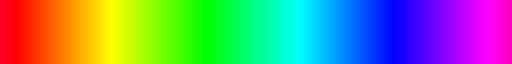

Python: (np.float64(0.0), np.float64(0.7), np.float64(0.19186169091292438), np.float64(1.0))

In [36]:
cmap = pyplot.cm.gist_rainbow
display(cmap)
rainbowcolors = [cmap(0.0), cmap(0.15), cmap(0.45), cmap(0.8)]
# dark green
np = pyimport("numpy")
rainbowcolors[3] = Py((np.float64(0.0), np.float64(0.7*1.0), np.float64(0.7*0.27408812987560627), np.float64(1.0)))

In [37]:
display(rainbowcolors)

4-element Vector{Py}:
 (np.float64(1.0), np.float64(0.0), np.float64(0.16), np.float64(1.0))
 (np.float64(1.0), np.float64(0.6433492315845257), np.float64(0.0), np.float64(1.0))
 (np.float64(0.0), np.float64(0.7), np.float64(0.19186169091292438), np.float64(1.0))
 (np.float64(0.16304347826086973), np.float64(0.0), np.float64(1.0), np.float64(1.0))

Color brew colors

In [39]:
c1 = [189,201,225] ./ 255
c2 = [116,169,207] ./ 255
c3 = [43,140,190] ./ 255
c4 = [4,90,141] ./ 255
blues = [c1, c2, c3, c4]

4-element Vector{Vector{Float64}}:
 [0.7411764705882353, 0.788235294117647, 0.8823529411764706]
 [0.4549019607843137, 0.6627450980392157, 0.8117647058823529]
 [0.16862745098039217, 0.5490196078431373, 0.7450980392156863]
 [0.01568627450980392, 0.35294117647058826, 0.5529411764705883]

Matsubara ranks vs R

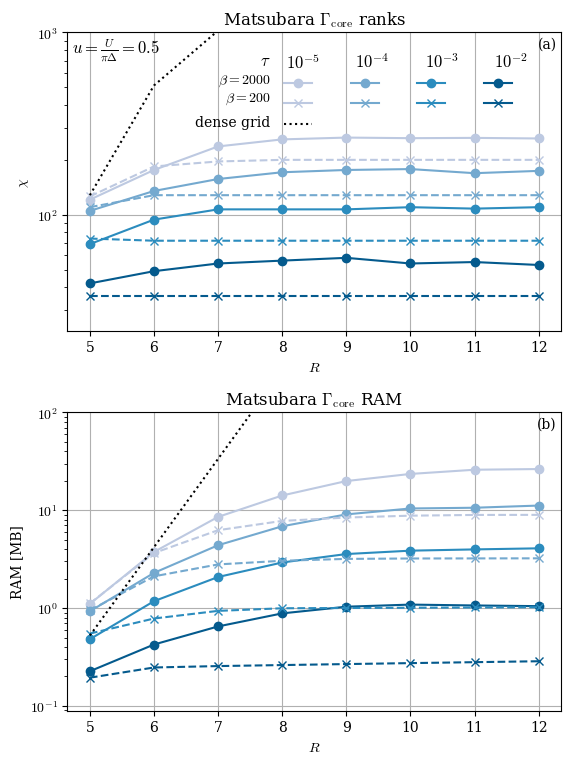

In [46]:
# page width
# fig, axs = subplots(1,2, figsize=(PLOT_PAGE_INCH, PLOT_PAGE_INCH*2.5/10))
# column width
fig, axs = subplots(2,1, figsize=(PLOT_COLUMN_INCH_OLD, PLOT_COLUMN_INCH_OLD*4/3))
axs[0].grid(true)
axs[1].grid(true)

PSFpath1 = joinpath(TCI4Keldysh.datadir(), "SIAM_u=0.50/PSF_nz=4_conn_zavg/")
PSFpath2 = joinpath(TCI4Keldysh.datadir(), "siam05_U0.05_T0.005_Delta0.0318/PSF_nz=2_conn_zavg/")
beta1 = round(Int, TCI4Keldysh.dir_to_beta(PSFpath1))
beta2 = round(Int, TCI4Keldysh.dir_to_beta(PSFpath2))

tol_range = 10.0 .^ (-5:-2)
show_worstcase = true
ramplot = true

logtol(tol) = -round(Int,log10(tol))


Rs = []
allplots = []
# colors = ["red", "blue", "green", "magenta", "brown"]
colors = blues
markers = ["o", "x"]
linestyles = ["solid", "dashed"]
for (i,beta) in enumerate([beta1,beta2])
    for (it, tol) in enumerate(tol_range)
        file_act = onlyJSON(joinpath(basepath, "gamcoreMF_pch_tol$(logtol(tol))_beta$(beta)"))
        addfile_act11 = onlyJSON(joinpath(basepath, "gamcoreMF_pch_tol$(logtol(tol))_beta$(beta)_R11"))
        addfile_act12 = onlyJSON(joinpath(basepath, "gamcoreMF_pch_tol$(logtol(tol))_beta$(beta)_R12"))
        files_add = [addfile_act11, addfile_act12]

        # plot
        d = TCI4Keldysh.readJSON(file_act)
        Rs = to_intvec(d["Rs"])
        bonddims = to_intvec.(d["bonddims"])
        push!(bonddims, Rbonddim_file(files_add[1], 11))
        push!(bonddims, Rbonddim_file(files_add[2], 12))
        rams = TCI4Keldysh.bonddims_to_RAM.(bonddims)
        rranks = to_intvec(d["ranks"])
        push!(rranks, Rrank_file(files_add[1], 11))
        push!(rranks, Rrank_file(files_add[2], 12))
        # rank plot
        pact = axs[0].plot(Rs[1:length(rranks)], rranks; linestyle=linestyles[i], color=colors[it], marker=markers[i], label="tol=$(TCI4Keldysh.tolstr(tol))")
        push!(allplots, pact) 
        # RAM plot
        pact = axs[1].plot(Rs[1:length(rranks)], rams; linestyle=linestyles[i], color=colors[it], marker=markers[i], label="tol=$(TCI4Keldysh.tolstr(tol))")
        push!(allplots, pact) 
    end
end

worst_line = nothing
if show_worstcase
    worstcase_ranks = [2^div(3*R,2) for R in Rs]
    worstcase_rams = [16 * 2^(3*R) / 10^6 for R in Rs]
    label = ramplot ? "dense grid" : "worst case"
    worst_line, = axs[0].plot(Rs, worstcase_ranks, color="black", linestyle=":", marker="None")
    axs[1].plot(Rs, worstcase_rams, label=label, color="black", linestyle=":", marker="None")

    for i in [0,1]
        yticks_exp = if i==0
                Int(floor(log10(worstcase_ranks[1]))):Int(floor(log10(worstcase_ranks[end])))
            else
                Int(floor(log10(worstcase_rams[1]))):Int(floor(log10(worstcase_rams[end])))
            end
        yticks = 10.0 .^ yticks_exp
        yticks_labels = [L"10^{%$y}" for y in yticks_exp]

        axs[i].set_yscale("log")
        axs[i].set_yticks(yticks)
        axs[i].set_yticklabels(yticks_labels)
    end
end

axs[0].set_title(L"Matsubara $\Gamma_{\mathrm{core}}$ ranks")
axs[0].set_xlabel(L"R")
axs[0].set_ylabel(L"\chi")
(y1, y2) = axs[0].get_ylim()
axs[0].set_ylim(y1, 10^3)
axs[1].set_title(L"Matsubara $\Gamma_{\mathrm{core}}$ RAM")
axs[1].set_xlabel(L"R")
(y1, y2) = axs[1].get_ylim()
axs[1].set_ylim(y1, 10^2)
axs[1].set_ylabel("RAM [MB]")

# annotate
abc_annotate(axs; color="black")
annotate_topleft(axs[0], L"u=\frac{U}{\pi\Delta}=0.5"; fontsize=12)

# tabular legend
mlines = pyimport("matplotlib.lines")
mpatch = pyimport("matplotlib.patches")
first_row = [
    mpatch.Patch(color="none", label=L"\beta=200"), mpatch.Patch(color="none", label=L"\beta=2000"), mpatch.Patch(color="none", label=L"\tau"),
    mpatch.Patch(color="none", label="dense grid")
    ]

col1 = [mlines.Line2D([],[], color=colors[j], marker=markers[1]) for j in eachindex(tol_range)]
col2 = [mlines.Line2D([],[], color=colors[j], marker=markers[2]) for j in eachindex(tol_range)]
tol_lablels = TCI4Keldysh.tolstr.(tol_range)
col3 = vcat(mlines.Line2D([],[], color="black", linestyle=":"), [mlines.Line2D([],[], color="white", lw=0) for j in 1:length(tol_range)-1])
bla = [ifelse(iseven(i), div(i,2), div(i,2)+1) for i in 1:2*length(col1)]
handles = [iseven(i) ? col2[bla[i]] : col1[bla[i]] for i in 1:2*length(col1)]
for (ic,c) in enumerate(col3)
    insert!(handles, 3*ic, c)
end
# annotate
subplotlabeloffset=3
axs[0].annotate(
L"\beta=2000",
xy=(0.42,0.85),
xycoords="axes fraction",
horizontalalignment="right",
verticalalignment="top",
xytext=(-subplotlabeloffset, +subplotlabeloffset),
textcoords="offset points",
color="black",
fontsize=10
)
axs[0].annotate(
L"\beta=200",
xy=(0.42,0.79),
xycoords="axes fraction",
horizontalalignment="right",
verticalalignment="top",
xytext=(-subplotlabeloffset, +subplotlabeloffset),
textcoords="offset points",
color="black",
fontsize=10
)
axs[0].annotate(
L"\tau",
xy=(0.42,0.92),
xycoords="axes fraction",
horizontalalignment="right",
verticalalignment="top",
xytext=(-subplotlabeloffset, +subplotlabeloffset),
textcoords="offset points",
color="black",
fontsize=12
)
axs[0].annotate(
"dense grid",
xy=(0.42,0.71),
xycoords="axes fraction",
horizontalalignment="right",
verticalalignment="top",
xytext=(-subplotlabeloffset, +subplotlabeloffset),
textcoords="offset points",
color="black",
fontsize=10
)
for (i,tol) in enumerate(tol_range)
    axs[0].annotate(
    L"10^{%$(TCI4Keldysh.tolstr(tol))}",
    xy=(0.38 + 0.140*i, 0.92),
    xycoords="axes fraction",
    horizontalalignment="right",
    verticalalignment="top",
    xytext=(-subplotlabeloffset, +subplotlabeloffset),
    textcoords="offset points",
    color="black",
    fontsize=12
    )
end

# worst_line2d = mlines.Line2D([0.5, 0.5],[0.6,0.5], color="black", linestyle="dashed", marker=nothing, label="dense grid")
# axs[0].add_line(worst_line2d)
# axs[0].annotate(
# "dense grid",
# xy=(0.42,0.72),
# xycoords="axes fraction",
# horizontalalignment="right",
# verticalalignment="top",
# xytext=(-subplotlabeloffset, +subplotlabeloffset),
# textcoords="offset points",
# arrowprops=Dict("arrowstyle"=>"-", "color"=>"black", "linestyle"=>"--", "linewidth"=>2, "connectionstyle"=>"arc3, rad=0"),
# color="black",
# fontsize=12
# )

lgd = fig.legend(handles=handles, ncols=4, bbox_to_anchor=(0.93,0.91), fontsize=10, frameon=false)
fig.tight_layout()
# fig.subplots_adjust(hspace=0.6)
savefig("MFvertex_ranks_tol=$(TCI4Keldysh.tolstr(minimum(tol_range)))to$(TCI4Keldysh.tolstr(maximum(tol_range))).pdf")
# non-tabular legend
# obtain handles with onecol_legend_colormarker
# lgd = fig.legend(handles=vcat(handles, [worst_line]), ncols=1, bbox_to_anchor=(1.06,0.90), fontsize=10)
# save_bbox(
#     "MFvertex_ranks_tol=$(TCI4Keldysh.tolstr(minimum(tol_range)))to$(TCI4Keldysh.tolstr(maximum(tol_range))).pdf",
#     fig,
#     lgd
# )

display(fig)

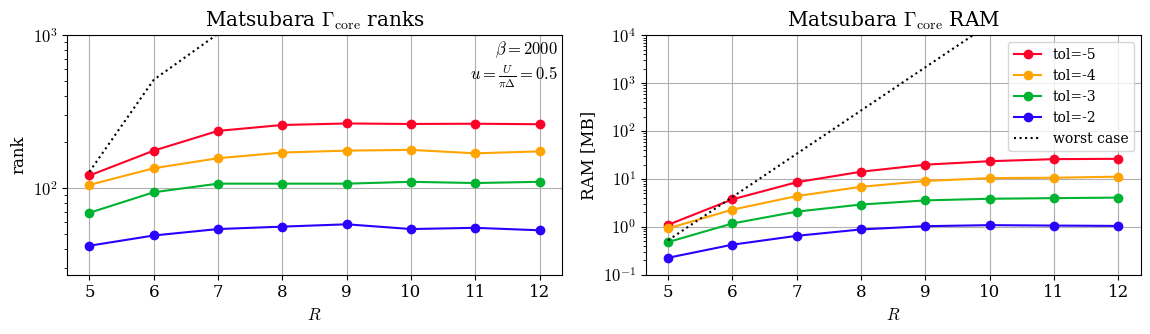

(y1, y2) = (<py np.float64(27.13218432484593)>, <py np.float64(405792.90882664756)>)


In [54]:
# Matsubara rank vs R

fig, axs = subplots(1,2, figsize=(PLOT_PAGE_INCH_OLD, PLOT_PAGE_INCH_OLD*3/10))
axs[0].grid(true)
axs[1].grid(true)

PSFpath1 = joinpath(TCI4Keldysh.datadir(), "SIAM_u=0.50/PSF_nz=4_conn_zavg/")
beta1 = round(Int, TCI4Keldysh.dir_to_beta(PSFpath1))

tol_range = 10.0 .^ (-5:-2)
show_worstcase = true
ramplot = true

logtol(tol) = -round(Int,log10(tol))


Rs = []
allplots = []
# colors = reverse(["red", "blue", "green", "magenta"])
colors = rainbowcolors
markers = ["o", "d"]
for (it, tol) in enumerate(tol_range)
    file_act1 = onlyJSON(joinpath(basepath, "gamcoreMF_pch_tol$(logtol(tol))_beta$(beta1)"))
    addfile_act11 = onlyJSON(joinpath(basepath, "gamcoreMF_pch_tol$(logtol(tol))_beta$(beta1)_R11"))
    addfile_act12 = onlyJSON(joinpath(basepath, "gamcoreMF_pch_tol$(logtol(tol))_beta$(beta1)_R12"))
    files = [file_act1]
    files_add1 = [addfile_act11, addfile_act12]
    files_add = [files_add1]
    for i in eachindex(files)
        file_act = files[i]

        # plot
        d = TCI4Keldysh.readJSON(file_act)
        Rs = to_intvec(d["Rs"])
        bonddims = to_intvec.(d["bonddims"])
        push!(bonddims, Rbonddim_file(files_add[i][1], 11))
        push!(bonddims, Rbonddim_file(files_add[i][2], 12))
        rams = TCI4Keldysh.bonddims_to_RAM.(bonddims)
        rranks = to_intvec(d["ranks"])
        push!(rranks, Rrank_file(files_add[i][1], 11))
        push!(rranks, Rrank_file(files_add[i][2], 12))
        # rank plot
        pact = axs[0].plot(Rs[1:length(rranks)], rranks; color=colors[it], marker=markers[i], label="tol=$(TCI4Keldysh.tolstr(tol))")
        push!(allplots, pact) 
        # RAM plot
        pact = axs[1].plot(Rs[1:length(rranks)], rams; color=colors[it], marker=markers[i], label="tol=$(TCI4Keldysh.tolstr(tol))")
        push!(allplots, pact) 
    end
end

worst_line = nothing
if show_worstcase
    worstcase_ranks = [2^div(3*R,2) for R in Rs]
    worstcase_rams = [16 * 2^(3*R) / 10^6 for R in Rs]
    label = ramplot ?  "worst case" : "dense grid"
    worst_line, = axs[0].plot(Rs, worstcase_ranks, label=label, color="black", linestyle=":", marker="None")
    axs[1].plot(Rs, worstcase_rams, label=label, color="black", linestyle=":", marker="None")

    for i in [0,1]
        yticks_exp = if i==0
                Int(floor(log10(worstcase_ranks[1]))):Int(floor(log10(worstcase_ranks[end])))
            else
                Int(floor(log10(worstcase_rams[1]))):Int(floor(log10(worstcase_rams[end])))
            end
        yticks = 10.0 .^ yticks_exp
        yticks_labels = [L"10^{%$y}" for y in yticks_exp]

        axs[i].set_yscale("log")
        axs[i].set_yticks(yticks)
        axs[i].set_yticklabels(yticks_labels)
    end
end

axs[0].set_title(L"Matsubara $\Gamma_{\mathrm{core}}$ ranks")
axs[0].set_xlabel(L"R")
axs[0].set_ylabel("rank")
(y1, y2) = axs[0].get_ylim()
@show (y1,y2)
axs[0].set_ylim(y1, 10^3)
axs[1].set_title(L"Matsubara $\Gamma_{\mathrm{core}}$ RAM")
axs[1].set_xlabel(L"R")
(y1, y2) = axs[1].get_ylim()
axs[1].set_ylim(y1, 10^4)
axs[1].set_ylabel("RAM [MB]")

# annotate
# abc_annotate(axs; color="black")
annotate_topright(axs[0], L"\beta=2000" * "\n" * L"u=\frac{U}{\pi\Delta}=0.5"; fontsize=12)

# handles = onecol_legend_colormarker(
#     colors,
#     ["o"],
#     [L"tol=$10^{%$(TCI4Keldysh.tolstr(tol))}$" for tol in tol_range],
#     [L"\beta=2000"]
# )
axs[1].legend(loc="upper right", fontsize=10)

# lgd = fig.legend(handles=vcat(handles, [worst_line]), ncols=1, bbox_to_anchor=(1.06,0.90))
fig.tight_layout()
# save_bbox(
#     "MFvertex_ranks_tol=$(TCI4Keldysh.tolstr(minimum(tol_range)))to$(TCI4Keldysh.tolstr(maximum(tol_range))).pdf",
#     fig,
#     lgd
# )
savefig("MFvertex_ranks_tol=$(TCI4Keldysh.tolstr(minimum(tol_range)))to$(TCI4Keldysh.tolstr(maximum(tol_range))).pdf")
display(fig)

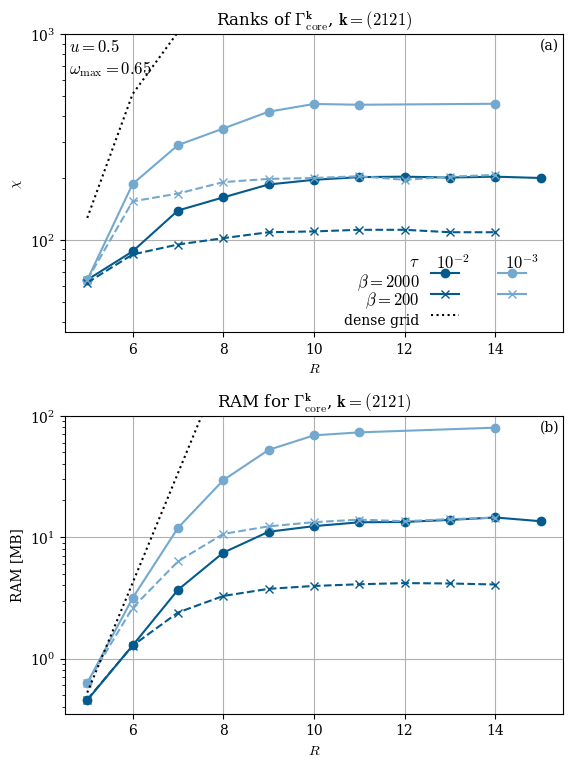

d2["Rs"] = [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
TCI4Keldysh.bonddims_to_RAM.(d2["bonddims"], 8) = [0.454656, 1.28, 3.675904, 7.44064, 11.058432, 12.29824, 13.224704, 13.32352, 13.844992, 14.49408, 13.497472]
worstcase_rams = [0.524288, 4.194304, 33.554432, 268.435456, 2147.483648, 17179.869184, 137438.953472, 1.099511627776e6, 8.796093022208e6, 7.0368744177664e7, 5.62949953421312e8]


In [65]:
# load Keldysh vertex data

# tolerance 2
f21 = joinpath(kcspath, "V_KF_bigbox_tol2_R0509")
f22 = joinpath(kcspath, "V_KF_bigbox_tol2_R1013")
f23 = joinpath(kcspath, "V_KF_bigbox_tol2_R1415")
d2 = join_data(f21,f22,f23)

# tolerance 3
f31 = joinpath(kcspath, "V_KF_bigbox_tol3_R0509")
f32 = joinpath(kcspath, "V_KF_bigbox_tol3_R1013")
f33 = joinpath(kcspath, "V_KF_bigbox_tol3_R1415")
d3 = join_data(f31,f32,f33)

# tolerance 2, beta200
e21 = joinpath(kcspath, "V_KF_bigbox_tol2_beta200_R0509")
e22 = joinpath(kcspath, "V_KF_bigbox_tol2_beta200_R1013")
e23 = joinpath(kcspath, "V_KF_bigbox_tol2_beta200_R1415")
d22 = join_data(e21,e22,e23)

# tolerance 3, beta200
e31 = joinpath(kcspath, "V_KF_bigbox_tol3_beta200_R0509")
e32 = joinpath(kcspath, "V_KF_bigbox_tol3_beta200_R1013")
e33 = joinpath(kcspath, "V_KF_bigbox_tol3_beta200_R1415")
d33 = join_data(e31,e32,e33)


# page width
# fig, ax = subplots(1,2, figsize=(PLOT_PAGE_INCH, PLOT_PAGE_INCH*3.3/10))
# column width
fig, ax = subplots(2,1, figsize=(PLOT_COLUMN_INCH_OLD, PLOT_COLUMN_INCH_OLD*4/3))

# worst case
ramplot = false
Rs = 5:15
worstcase_ranks = [2^div(3*R,2) for R in Rs]
worstcase_rams = [16 * 2^(3*R) / 10^6 for R in Rs]
label = ramplot ? "dense grid" : "worst case"
worst_line, = ax[0].plot(Rs, worstcase_ranks, label=label, color="black", linestyle=":", marker="None")

# colors = ["red", "blue"]
colors = blues # defined above together with rainbow colors
# ranks
ax[0].plot(d2["Rs"], d2["ranks"]; label=L"tol=$10^{-2}$", marker="o", color=colors[4])
ax[0].plot(d3["Rs"], d3["ranks"]; label=L"tol=$10^{-3}$", marker="o", color=colors[2])
ax[0].plot(d22["Rs"], d22["ranks"]; label=L"tol=$10^{-2}$", marker="x", color=colors[4], linestyle="dashed")
ax[0].plot(d33["Rs"], d33["ranks"]; label=L"tol=$10^{-3}$", marker="x", color=colors[2], linestyle="dashed")
ax[0].set_xlabel(L"R")
ax[0].set_ylabel(L"\chi")
ax[0].set_title(L"Ranks of $\Gamma_{\mathrm{core}}^{\mathbf{k}}$, $\mathbf{k}=(2121)$")
# ax[0].legend()
ax[0].grid(true)
ax[0].set_yscale("log")
(y1,y2) = ax[0].get_ylim()
ax[0].set_ylim(y1, 10^3)

# RAM
ax[1].plot(d2["Rs"], TCI4Keldysh.bonddims_to_RAM.(d2["bonddims"], 8); label=L"tol=$10^{-2}$", marker="o", color=colors[4])
ax[1].plot(d3["Rs"], TCI4Keldysh.bonddims_to_RAM.(d3["bonddims"], 8); label=L"tol=$10^{-3}$", marker="o", color=colors[2])
ax[1].plot(d22["Rs"], TCI4Keldysh.bonddims_to_RAM.(d22["bonddims"], 8); label=L"tol=$10^{-2}$", marker="x", color=colors[4], linestyle="dashed")
ax[1].plot(d33["Rs"], TCI4Keldysh.bonddims_to_RAM.(d33["bonddims"], 8); label=L"tol=$10^{-3}$", marker="x", color=colors[2], linestyle="dashed")
ax[1].set_xlabel(L"R")
ax[1].set_ylabel("RAM [MB]")
ax[1].set_title(L"RAM for $\Gamma_{\mathrm{core}}^{\mathbf{k}}$, $\mathbf{k}=(2121)$")
# ax[1].legend(loc="lower right", fontsize=12)
ax[1].grid(true)
ax[1].set_yscale("log")
(y1,y2) = ax[1].get_ylim()
ax[1].set_ylim(y1, 10^2)
worst_line_ram, = ax[1].plot(Rs, worstcase_rams, label=label, color="black", linestyle=":", marker="None")

markers = ["o", "x"]
tol_range = [1.e-2, 1.e-3]
# handles = onecol_legend_colormarker(
#     colors,
#     markers,
#     [L"tol=$10^{%$(TCI4Keldysh.tolstr(tol))}$" for tol in tol_range],
#     [L"\beta=2000",L"\beta=200"]
# )
# lgd = fig.legend(handles=vcat(handles, [worst_line]), ncols=2, bbox_to_anchor=(0.95,0.68), fontsize=10)
annotate_topleft(ax[0], L"u=0.5" * "\n" * L"\omega_{\max}=0.65"; fontsize=12)

# TABULAR legend
mlines = pyimport("matplotlib.lines")
handles = [
    mlines.Line2D([],[], color=colors[4], marker=markers[1]),
    mlines.Line2D([],[], color=colors[4], marker=markers[2]),
    mlines.Line2D([],[], color="black", linestyle=":"),
    mlines.Line2D([],[], color=colors[2], marker=markers[1]),
    mlines.Line2D([],[], color=colors[2], marker=markers[2]),
    mlines.Line2D([],[], color="white", lw=0),
]
ax[0].annotate(
L"\beta=2000",
xy=(0.72, 0.19),
xycoords="axes fraction",
horizontalalignment="right",
verticalalignment="top",
xytext=(-subplotlabeloffset, +subplotlabeloffset),
textcoords="offset points",
color="black",
fontsize=12
)
ax[0].annotate(
L"\beta=200",
xy=(0.72, 0.13),
xycoords="axes fraction",
horizontalalignment="right",
verticalalignment="top",
xytext=(-subplotlabeloffset, +subplotlabeloffset),
textcoords="offset points",
color="black",
fontsize=12
)
ax[0].annotate(
L"\tau",
xy=(0.72, 0.25),
xycoords="axes fraction",
horizontalalignment="right",
verticalalignment="top",
xytext=(-subplotlabeloffset, +subplotlabeloffset),
textcoords="offset points",
color="black",
fontsize=12
)
ax[0].annotate(
"dense grid",
xy=(0.72, 0.05),
xycoords="axes fraction",
horizontalalignment="right",
verticalalignment="top",
xytext=(-subplotlabeloffset, +subplotlabeloffset),
textcoords="offset points",
color="black",
fontsize=10
)
for (i,tol) in enumerate(tol_range)
    ax[0].annotate(
    L"10^{%$(TCI4Keldysh.tolstr(tol))}",
    xy=(0.68 + 0.140*i, 0.25),
    xycoords="axes fraction",
    horizontalalignment="right",
    verticalalignment="top",
    xytext=(-subplotlabeloffset, +subplotlabeloffset),
    textcoords="offset points",
    color="black",
    fontsize=12
    )
end
lgd = fig.legend(handles=handles, ncols=2, bbox_to_anchor=(0.95,0.665), fontsize=10, frameon=false)


ommax = TCI4Keldysh.readJSON(onlyJSON(f21))["ommax"]
# annotate_bottomright(ax[0], L"\beta=2000" * "\n" * L"u=0.5" * "\n" * L"ω_{\max}=%$ommax"; fontsize=10)
fig.tight_layout()
abc_annotate(ax; color="black")
savefig("V_KF_ranks.pdf")
display(fig)
@show d2["Rs"]
@show TCI4Keldysh.bonddims_to_RAM.(d2["bonddims"], 8)
@show worstcase_rams;

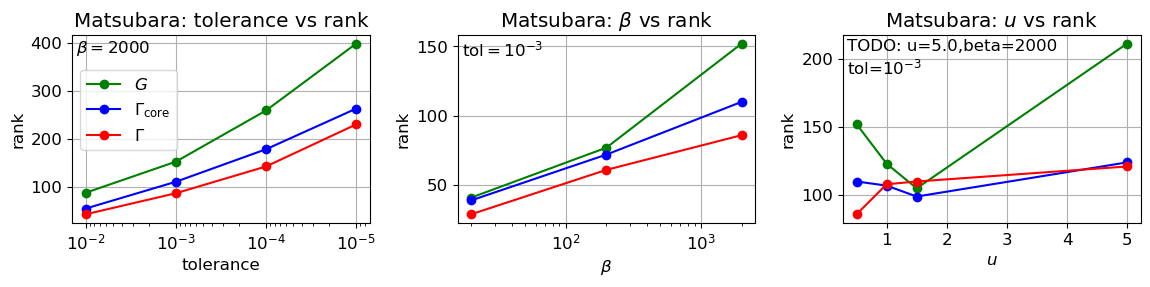

Python: None

In [26]:
# Matsubara: tolerance, beta and u vs. rank for full/core vertex + full correlator at R=10

# PSFpaths = [
#     joinpath(TCI4Keldysh.datadir(), "siam05_U0.05_T0.005_Delta0.0318/PSF_nz=2_conn_zavg/"),
#     joinpath(TCI4Keldysh.datadir(), "SIAM_u=0.50/PSF_nz=4_conn_zavg/")
#     joinpath(TCI4Keldysh.datadir(), "siam05_U0.05_T0.05_Delta0.0318/PSF_nz=2_conn_zavg/"),
#     ]

# plot
fig, axs = subplots(1, 3, figsize=(PLOT_PAGE_INCH, PLOT_PAGE_INCH*1.3/5))
set_rcParams(12)

for ax in axs
    ax.grid(true)
end

R = 10

# tol vs rank
    # collect data
tol_int = -5:-2
tol_range = collect(10.0 .^ tol_int)
    # collect data
corr_ranks = Int[]
V_ranks = Int[]
Vfull_ranks = Int[]
for tol in tol_int
    folder = joinpath(basepath, "corrMF_pch_tol$(-tol)_beta2000")
    d = TCI4Keldysh.readJSON(onlyJSON(folder))
    push!(corr_ranks, Rrank(d, R))

    folder = joinpath(basepath, "gamcoreMF_pch_tol$(-tol)_beta2000")
    d = TCI4Keldysh.readJSON(onlyJSON(folder))
    push!(V_ranks, Rrank(d,R))

    folder = joinpath(basepath, "fullvertexMF_pch_tol$(-tol)_beta2000")
    d = TCI4Keldysh.readJSON(onlyJSON(folder))
    push!(Vfull_ranks, Rrank(d,R))
end

axs[0].plot(tol_range, corr_ranks; color="green", marker="o", label=L"G")
axs[0].plot(tol_range, V_ranks; color="blue", marker="o", label=L"\Gamma_{\mathrm{core}}")
axs[0].plot(tol_range, Vfull_ranks; color="red", marker="o", label=L"\Gamma")
axs[0].set_xscale("log")
axs[0].set_ylabel("rank")
axs[0].set_xlabel("tolerance")
axs[0].set_title("Matsubara: tolerance vs rank")
axs[0].invert_xaxis()
axs[0].legend(loc="center left", bbox_to_anchor=(0.0,0.6))
annotate_topleft(axs[0], L"\beta=2000")

# beta vs rank
    # collect data
betas = [20, 200, 2000]
corr_ranks = Int[]
V_ranks = Int[]
Vfull_ranks = Int[]

for beta in betas

    folder = joinpath(basepath, "corrMF_pch_tol3_beta$(beta)")
    push!(corr_ranks, Rrank(folder, R))

    folder = joinpath(basepath, "gamcoreMF_pch_tol3_beta$(beta)")
    push!(V_ranks, Rrank(folder, R))

    folder = joinpath(basepath, "fullvertexMF_pch_tol3_beta$(beta)")
    push!(Vfull_ranks, Rrank(folder, R))
end

axs[1].plot(betas, corr_ranks; color="green", marker="o", label=L"G")
axs[1].plot(betas, V_ranks; color="blue", marker="o", label=L"\Gamma_{\mathrm{core}}")
axs[1].plot(betas, Vfull_ranks; color="red", marker="o", label=L"\Gamma")
axs[1].set_xscale("log")
axs[1].set_ylabel("rank")
axs[1].set_xlabel(L"\beta")
axs[1].set_title(L"Matsubara: $\beta$ vs rank")
annotate_topleft(axs[1], L"tol$=10^{-3}$")

# u vs rank
    # collect data, beta=2000, tol=1.e-3
us = [0.5, 1.0, 1.5, 5.0]
corr_ranks = Int[]
V_ranks = Int[]
Vfull_ranks = Int[]

folder = joinpath(basepath, "corrMF_pch_tol3_beta2000")
push!(corr_ranks, Rrank(folder, R))
folder = joinpath(basepath, "corrMF_u1.0")
push!(corr_ranks, Rrank(folder, R))
folder = joinpath(basepath, "corrMF_u1.5")
push!(corr_ranks, Rrank(folder, R))
folder = joinpath(basepath, "corrMF_u5.0")
push!(corr_ranks, Rrank(folder, R))


folder = joinpath(basepath, "gamcoreMF_pch_tol3_beta2000")
push!(V_ranks, Rrank(folder, R))
folder = joinpath(basepath, "gamcoreMF_pch_u=1.0_tol3_beta2000")
push!(V_ranks, Rrank(folder, R))
folder = joinpath(basepath, "gamcoreMF_pch_u=1.50_tol3_beta2000")
push!(V_ranks, Rrank(folder, R))
folder = joinpath(basepath, "gamcoreMF_pch_u=5.0_tol3")
push!(V_ranks, Rrank(folder, R))

folder = joinpath(basepath, "fullvertexMF_pch_tol3_beta2000")
push!(Vfull_ranks, Rrank(folder, R))
for u in us[2:end]
    folder = joinpath(basepath, "fullvertexcMF_pch_tol3_u=$u")
    push!(Vfull_ranks, Rrank(folder, R))
end

axs[2].plot(us, corr_ranks; color="green", marker="o", label=L"G, \beta=2000")
axs[2].plot(us, V_ranks; color="blue", marker="o", label=L"\Gamma_{\mathrm{core}}, \tol=$10^{-3}$")
axs[2].plot(us, Vfull_ranks; color="red", marker="o", label=L"\Gamma, \tol=$10^{-3}$")
axs[2].set_ylabel("rank")
axs[2].set_xlabel(L"u")
axs[2].set_title(L"Matsubara: $u$ vs rank")
annotate_topleft(axs[2], "TODO: u=5.0,beta=2000" * "\n" * L"tol=$10^{-3}$")

# fig.legend(bbox_to_anchor=(0.9,0.9))
tight_layout()

display(fig)
savefig("MF_params_vs_rank.pdf")


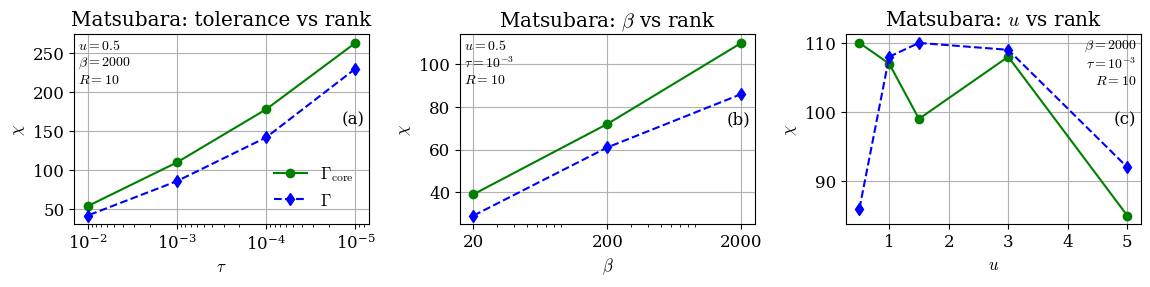

In [92]:

# Matsubara: tolerance, beta and u vs. rank for full/core vertex

# PSFpaths = [
#     joinpath(TCI4Keldysh.datadir(), "siam05_U0.05_T0.005_Delta0.0318/PSF_nz=2_conn_zavg/"),
#     joinpath(TCI4Keldysh.datadir(), "SIAM_u=0.50/PSF_nz=4_conn_zavg/")
#     joinpath(TCI4Keldysh.datadir(), "siam05_U0.05_T0.05_Delta0.0318/PSF_nz=2_conn_zavg/"),
#     ]

# plot
fig, axs = subplots(1, 3, figsize=(PLOT_PAGE_INCH_OLD, PLOT_PAGE_INCH_OLD*1.3/5))
set_rcParams(12)

for ax in axs
    ax.grid(true)
end

R = 10

# tol vs rank
    # collect data
tol_int = -5:-2
tol_range = collect(10.0 .^ tol_int)
    # collect data
V_ranks = Int[]
Vfull_ranks = Int[]
for tol in tol_int
    folder = joinpath(basepath, "gamcoreMF_pch_tol$(-tol)_beta2000")
    d = TCI4Keldysh.readJSON(onlyJSON(folder))
    push!(V_ranks, Rrank(d,R))

    folder = joinpath(basepath, "fullvertexMF_pch_tol$(-tol)_beta2000")
    d = TCI4Keldysh.readJSON(onlyJSON(folder))
    push!(Vfull_ranks, Rrank(d,R))
end

# for core and full vertex
colors = ["green", "blue"]

axs[0].plot(tol_range, V_ranks; color=colors[1], marker="o", label=L"\Gamma_{\mathrm{core}}")
axs[0].plot(tol_range, Vfull_ranks; linestyle="dashed", color=colors[2], marker="d", label=L"\Gamma")
axs[0].set_xscale("log")
axs[0].set_ylabel(L"\chi")
axs[0].set_xlabel(L"\tau")
axs[0].set_title("Matsubara: tolerance vs rank")
axs[0].invert_xaxis()
# axs[0].legend(loc="center left", bbox_to_anchor=(0.0,0.6))
axs[0].legend(loc="lower right", frameon=false)
annotate_topleft(axs[0], L"u=0.5" * "\n" * L"\beta=2000" * "\n" * L"R=10"; fontsize=10)

# beta vs rank
    # collect data
betas = [20, 200, 2000]
V_ranks = Int[]
Vfull_ranks = Int[]

for beta in betas

    folder = joinpath(basepath, "gamcoreMF_pch_tol3_beta$(beta)")
    push!(V_ranks, Rrank(folder, R))

    folder = joinpath(basepath, "fullvertexMF_pch_tol3_beta$(beta)")
    push!(Vfull_ranks, Rrank(folder, R))
end

axs[1].plot(betas, V_ranks; color=colors[1], marker="o", label=L"\Gamma_{\mathrm{core}}")
axs[1].plot(betas, Vfull_ranks; linestyle="dashed", color=colors[2], marker="d", label=L"\Gamma")
axs[1].set_xscale("log")
axs[1].set_ylabel(L"\chi")
axs[1].set_xlabel(L"\beta")
axs[1].set_xticks(betas)
axs[1].set_xticklabels(["$(Int(beta))" for beta in betas])
axs[1].set_title(L"Matsubara: $\beta$ vs rank")
annotate_topleft(axs[1], L"u=0.5" * "\n" * L"$\tau=10^{-3}$" * "\n" * L"R=10"; fontsize=10)

# u vs rank
    # collect data, beta=2000, tol=1.e-3
us = [0.5, 1.0, 1.5, 3.0, 5.0]
V_ranks = Int[]
Vfull_ranks = Int[]

push!(V_ranks, Rrank(joinpath(basepath, "gamcoreMF_pch_tol3_beta2000"), R))
push!(V_ranks, Rrank(joinpath(basepath, "gamcoreMF_pch_u=1.0_tol3_beta2000"), R))
push!(V_ranks, Rrank(joinpath(basepath, "gamcoreMF_pch_u=1.50_tol3_beta2000"), R))
push!(V_ranks, Rrank(joinpath(basepath, "matsubaracore_u3"), R))
push!(V_ranks, Rrank(joinpath(basepath, "matsubaracore_u5"), R))

push!(Vfull_ranks, Rrank(joinpath(basepath, "fullvertexMF_pch_tol3_beta2000"), R))
for u in us[2:end-2]
    push!(Vfull_ranks, Rrank(joinpath(basepath, "fullvertexcMF_pch_tol3_u=$u"), R))
end
push!(Vfull_ranks, Rrank(joinpath(basepath, "matsubarafull_u3"), R))
push!(Vfull_ranks, Rrank(joinpath(basepath, "matsubarafull_u5"), R))

axs[2].plot(us, V_ranks; color=colors[1], marker="o", label=L"$\Gamma_{\mathrm{core}},\tau=10^{-3}$")
axs[2].plot(us, Vfull_ranks; linestyle="dashed", color=colors[2], marker="d", label=L"$\Gamma, \tau=10^{-3}$")
axs[2].set_ylabel(L"\chi")
axs[2].set_xlabel(L"u")
axs[2].set_title(L"Matsubara: $u$ vs rank")
annotate_topright(axs[2], L"\beta=2000" * "\n" * L"$\tau=10^{-3}$" * "\n" * L"R=10"; fontsize=10)

# fig.legend(bbox_to_anchor=(0.9,0.9))
abc_annotate(axs; yoff=55)
tight_layout()

savefig("MF_params_vs_rank.pdf")
display(fig)

In [93]:
# Keldysh: tolerance, beta and u vs. rank for full/core vertex + full correlator at R=10
# PSFpaths = [
#     joinpath(TCI4Keldysh.datadir(), "siam05_U0.05_T0.005_Delta0.0318/PSF_nz=2_conn_zavg/"),
#     joinpath(TCI4Keldysh.datadir(), "SIAM_u=0.50/PSF_nz=4_conn_zavg/")
#     joinpath(TCI4Keldysh.datadir(), "siam05_U0.05_T0.05_Delta0.0318/PSF_nz=2_conn_zavg/"),
#     ]

# plot
fig, axs = subplots(1, 3, figsize=(PLOT_PAGE_INCH, PLOT_PAGE_INCH*1.3/5))
set_rcParams(12)

for ax in axs
    ax.grid(true)
end

R = 12
ms = ["o","d"]
lsts = ["solid", "dashed"]
cls = ["green", "blue"]

# tol vs rank
    # collect data
tol_range = [2.e-3, 4.e-3, 6.e-3, 1.e-2]
    # collect data
# corr_ranks = Int[]
V_ranks = Int[]
V_files = [
    # "V_KF_bigbox_tol3_R1013"
    "V_KF_bigbox_tol3.2"
    "V_KF_bigbox_tol3.4"
    "V_KF_bigbox_tol3.6"
    "V_KF_bigbox_tol2_R1013"
]
Vfull_ranks = Int[]
V_full_files = [
    # "V_KF_full_bigbox_tol3"
    "V_KF_full_bigbox_tol3.2"
    "V_KF_full_bigbox_tol3.4"
    "V_KF_full_bigbox_tol3.6"
    "V_KF_full_bigbox_pch"
]
for i in 1:4
    push!(V_ranks, Rrank(joinpath(kcspath, V_files[i]), R))
    push!(Vfull_ranks, Rrank(joinpath(kcspath, V_full_files[i]), R))
end

@show V_ranks
@show Vfull_ranks


# core and full
# axs[0].plot(tol_range, corr_ranks; color="green", marker="o", label=L"G")
axs[0].plot(tol_range, V_ranks; color=cls[1], marker=ms[1], ls=lsts[1], label=L"\Gamma_{\mathrm{core}}")
axs[0].plot(tol_range, Vfull_ranks; color=cls[2], marker=ms[2], ls=lsts[2], label=L"\Gamma")
axs[0].set_xscale("log")
axs[0].set_ylabel(L"\chi")
axs[0].set_xlabel(L"\tau")
axs[0].set_title("Keldysh: tolerance vs rank")
axs[0].tick_params(
    axis="both",
    which="both",
    labelbottom=false,
    labelleft=true,
    bottom=false,
    left=true
)
axs[0].invert_xaxis()
axs[0].legend(loc="center right", bbox_to_anchor=(1.05,0.15), frameon=false)
# axs[0].set_xticks([1.e-2,2.e-3])
# axs[0].tick_params(labelbottom=false, bottom=false)
axs[0].set_xticks(tol_range)
# # ticklabels = ["$(Int(t/1.e-3))e-3" for t in tol_range]
ticklabels = ["$(Int(t/1.e-3))" for t in tol_range]
axs[0].set_xticklabels(ticklabels)
axs[0].tick_params(labelbottom=true, bottom=true)
axs[0].tick_params(which="minor", labelbottom=false, bottom=true)
axs[0].annotate(
    L"\times 10^{-3}",
    xy=(1.2,-0.07),
    xycoords="axes fraction",
    horizontalalignment="right",
    verticalalignment="top",
    xytext=(-3, +3),
    textcoords="offset points",
    color="black",
    fontsize=12
)
annotate_topleft(axs[0], L"u=0.5" * "\n" * L"\beta=2000" * "\n" * L"\omega_{\max}=0.65" * "\n" * L"R=12"; fontsize=10)

# beta vs rank
    # collect data
betas = [20, 200, 2000]
# corr_ranks = Int[]
V_ranks = Int[]
V_files = [
    "VG_V_KF_bigbox_tol2_beta20"
    "VG_V_KF_bigbox_tol2_beta200"
    "V_KF_bigbox_tol2_R1013"
]
Vfull_ranks = Int[]
V_full_files = [
    "VG_V_KF_full_bigbox_beta20"
    "VG_V_KF_full_bigbox_beta200"
    "VG_V_KF_full_bigbox_pch"
]

for i in 1:3
    push!(V_ranks, Rrank(joinpath(basepath, V_files[i]), R))
    push!(Vfull_ranks, Rrank(joinpath(kcspath, V_full_files[i]), R))
end

@show V_ranks
@show Vfull_ranks

# axs[1].plot(betas, corr_ranks; color="green", marker="o", label=L"G")
axs[1].plot(betas, V_ranks; color=cls[1], marker=ms[1], ls=lsts[1], label=L"\Gamma_{\mathrm{core}}")
axs[1].plot(betas, Vfull_ranks; color=cls[2], marker=ms[2], ls=lsts[2], label=L"\Gamma")
axs[1].set_xscale("log")
axs[1].set_ylabel(L"\chi")
axs[1].set_xlabel(L"\beta")
axs[1].set_xticks(betas)
axs[1].set_xticklabels(["$(Int(beta))" for beta in betas])
axs[1].set_title(L"Keldysh: $\beta$ vs rank")
annotate_topleft(axs[1], L"u=0.5" * "\n" * L"\omega_{\max}=0.65" * "\n" * L"$\tau=10^{-2}$" * "\n" * L"R=12"; fontsize=10)

# u vs rank
us = [0.5, 1.0, 1.5, 3.0, 5.0]
# corr_ranks = Int[]
V_ranks = Int[]
V_files = [
    "V_KF_bigbox_tol2_R1013"
    "V_KF_bigbox_tol2_u1.0"
    "V_KF_bigbox_tol2_u1.5"
    "V_KF_tol2_u3"
    "V_KF_tol2_u5_beta2000"
]
Vfull_ranks = Int[]
V_full_files = [
    "V_KF_full_bigbox_pch"
    "V_KF_full_bigbox_u1.0"
    "V_KF_full_bigbox_u1.5"
    "V_KF_full_tol2_u3"
    "V_KF_full_tol2_u5"
]
for i in 1:length(us)
    push!(V_ranks, Rrank(joinpath(kcspath, V_files[i]), R) )
    push!(Vfull_ranks, Rrank(joinpath(kcspath, V_full_files[i]), R) )
end

@show V_ranks
@show Vfull_ranks

# axs[2].plot(us, corr_ranks; color="green", marker="o", label=L"G, \beta=2000")
axs[2].plot(us, V_ranks; color=cls[1], marker=ms[1], ls=lsts[1], label=L"\Gamma_{\mathrm{core}}, \tol=$10^{-3}$")
axs[2].plot(us, Vfull_ranks; color=cls[2], marker=ms[2], ls=lsts[2], label=L"\Gamma, \tol=$10^{-3}$")
axs[2].set_ylabel(L"\chi")
axs[2].set_xlabel(L"u")
axs[2].set_title(L"Keldysh: $u$ vs rank")
# annotate_topleft(axs[2], "TODO: u=5.0,beta=2000" * "\n" * L"tol=$10^{-3}$")
annotate_topright(axs[2], L"\beta=2000" * "\n" * L"$\tau=10^{-2}$" * "\n" * L"R=12"; fontsize=10)

axs[2].annotate(
    L"\omega_{\max}=0.08",
    xy=(0.77,0.53),
    xycoords="axes fraction",
    horizontalalignment="right",
    verticalalignment="top",
    xytext=(-3, -3),
    textcoords="offset points",
    color="black",
    fontsize=10
)

axs[2].annotate(
    L"\omega_{\max}=0.65",
    xy=(0.33,0.75),
    xycoords="axes fraction",
    horizontalalignment="right",
    verticalalignment="top",
    xytext=(-3, -3),
    textcoords="offset points",
    color="black",
    fontsize=10
)


axs[2].annotate(
    L"\omega_{\max}=0.04",
    xy=(1.1,0.30),
    xycoords="axes fraction",
    horizontalalignment="right",
    verticalalignment="top",
    xytext=(-3, -3),
    textcoords="offset points",
    color="black",
    fontsize=10
)

# fig.legend(bbox_to_anchor=(0.9,0.9))
abc_annotate(axs; yoff=45)
tight_layout()
subplots_adjust(wspace=0.3)
savefig("KF_params_vs_rank.pdf")
display(fig)

V_ranks = [359, 278, 250, 203]
Vfull_ranks = [226, 163, 137, 111]


ErrorException: No JSON found in /scratch/m/M.Frankenbach/tci4keldysh/cluster_output/VG_V_KF_bigbox_tol2_beta20

### Keldysh slice plot

In [ ]:
using Serialization
using BenchmarkTools
import QuanticsGrids as QG

#=
Nice to show:
V_KF_bigbox_tol2_R1013, R=13
V_KF_bigbox_tol2_u1.5, R=12 (smaller box would come in handy)
V_KF_bigbox_tol2_u5, R=12 (checked for beta=10^4 data set)
V_KF_bigbox_tol2_beta20, R=12

take care of using an appropriate box size for ref-tci-error triptychs!
=#

folder = joinpath(kcspath, "V_KF_bigbox_tol2_R1013")
# folder = joinpath(kcspath, "V_KF_bigbox_tol2_updown_R1013")
# folder = joinpath(kcspath, "V_KF_bigbox_tol2_u5.0")
# folder = joinpath(kcspath, "V_KF_bigbox_iK2")
# folder = joinpath(kcspath, "V_KF_bigbox_tol2_u1.5")
# folder = joinpath(kcspath, "V_KF_bigbox_tol2_u5_beta2000")
# folder = joinpath(kcspath, "V_KF_bigbox_tol2_u1.0")
# folder = joinpath(kcspath, "V_KF_bigbox_tol2_beta20")
# folder = joinpath(kcspath, "V_KF_bigbox_tol2_beta200")
# folder = joinpath(kcspath, "V_KF_bigbox_tol3_R1013")
# folder = joinpath(kcspath, "V_KF_pch_tol2_iK6_R0509")
R = 13
qtt_file = only(filter(f -> endswith(f, "R=$(R)_qtt.serialized"), readdir(folder))) 
(tci, grid) = deserialize(joinpath(folder, qtt_file))

Nhalf = 2^(R-1)
transfer_offset = 0

bit_pos = collect(1:3:3*R)
bit_val = fill(0, R)
QG.index_to_quantics_fused!(bit_val, (Nhalf+1+transfer_offset,))
@show bit_val
# ω=const
rm_val = [ifelse(bit_val[i]==1, collect(1:2:8), collect(2:2:8)) for i in 1:R]
# rm_val = [ifelse(bit_val[i]==1, collect(1:4), collect(5:8)) for i in 1:R]
ttslice = TCI4Keldysh.project_legs(tci.sitetensors, collect(1:R), rm_val)
@show size.(ttslice)
slice_fat_q = TCI4Keldysh.qtt_to_fattensor(ttslice)
slice_fat = TCI4Keldysh.qinterleaved_fattensor_to_regular(reshape(slice_fat_q, ntuple(_->2, 2*R)), R)
@show size(slice_fat)


bit_val = [2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
size.(ttslice) = [(1, 4, 8), (8, 4, 40), (40, 4, 105), (105, 4, 174), (174, 4, 201), (201, 4, 173), (173, 4, 74), (74, 4, 30), (30, 4, 14), (14, 4, 9), (9, 4, 4), (4, 4, 3), (3, 4, 1)]
size(slice_fat) = (8192, 8192)


(8192, 8192)

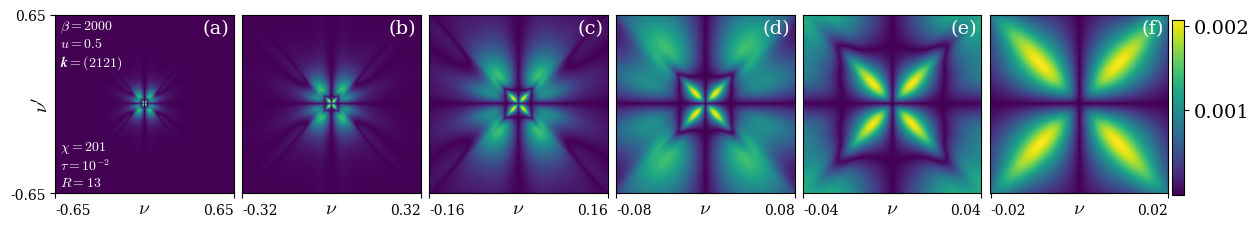

sys:1: UserWarning: This figure was using a layout engine that is incompatible with subplots_adjust and/or tight_layout; not calling subplots_adjust.


In [46]:

fig, axs = subplots(1, 6; figsize=(PLOT_PAGE_INCH, PLOT_PAGE_INCH*3/5), layout="constrained")

maxref = maximum(abs.(slice_fat))
logmaxref = log10(maxref)
gmin = -0.65
gmax = 0.65
dg = (gmax-gmin)/(2^R-1)
im = nothing
scfun(x::ComplexF64) = abs(x)
for i in 1:length(axs)
    slice = Nhalf-2^(R-i)+1:Nhalf+2^(R-i)-1
    im = axs[i-1].imshow(scfun.(slice_fat[slice, slice]))
    # if i==length(axs)
    #     global im = imloc
    # end
    axs[i-1].invert_yaxis()
    if i>1
        remove_ticks(axs[i-1])
        axs[i-1].tick_params(
            axis="x",
            which="both",
            labelbottom=true,
            labelleft=false,
            bottom=true,
            left=false
        )
        axs[i-1].set_xlabel(L"\nu", labelpad=-13)
        axs[i-1].set_xticks([1,length(slice)])
        axs[i-1].set_xticklabels([
            round(gmin + dg*(slice[1]-1); digits=2),
            round(gmin + dg*(slice[end]-1); digits=2)
            ]; fontsize=10)
    end
    ticks = axs[i-1].xaxis.get_majorticklabels()
    ticks[0].set_horizontalalignment("left")
    ticks[1].set_horizontalalignment("right")
end
axs[0].tick_params(
    axis="both",
    which="both",
    labelbottom=true,
    labelleft=true,
    bottom=true,
    left=true
)
# ticks
axs[0].set_xlabel(L"\nu", labelpad=-13)
axs[0].set_ylabel(L"\nu'", labelpad=-31)
axs[0].set_xticks([1,2^R])
axs[0].set_xticklabels([-0.65,0.65]; fontsize=10)
axs[0].set_yticks([1,2^R])
axs[0].set_yticklabels([-0.65,0.65]; fontsize=10)
# parameter annotations
annotate_topleft(
    axs[0], L"\beta=2000" * "\n" * L"u=0.5"*"\n"*L"\boldsymbol{k}=(2121)";
    color="white", fontsize=10
)
annotate_bottomleft(
    axs[0], L"\chi=201" * "\n" * L"\tau=10^{-2}"*"\n"*L"R=%$R";
    color="white", fontsize=10
)
# colorbar
vmin = minimum(abs.(slice_fat))
vmin = maximum(abs.(slice_fat))
# cbar = fig.colorbar(im, ax=axs.ravel().tolist(), orientation="vertical", fraction=0.05, pad=0.02, aspect=30, shrink=0.5)
cbar_ax = fig.add_axes([1.0, 0.37, 0.01, 0.25])
cbar = fig.colorbar(im, cax=cbar_ax, orientation="vertical", fraction=0.05, pad=0.01, aspect=30, shrink=0.3)
# layout
subplots_adjust(wspace=0.02)
abc_annotate(axs; color="white")
savefig("KeldyshZoom1.pdf", dpi=500, bbox_inches="tight")
display(fig)

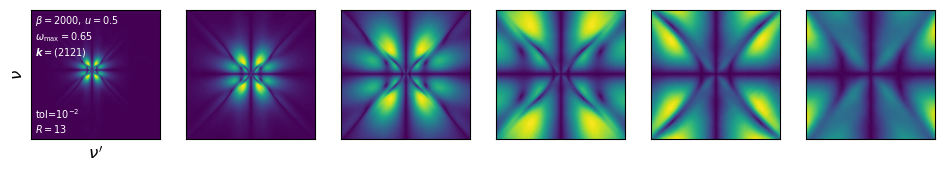

In [75]:

# good for R=13, transfer_offset=500
fig, axs = subplots(1, 6; figsize=(PLOT_PAGE_INCH, PLOT_PAGE_INCH*3/5))

maxref = maximum(abs.(slice_fat))
logmaxref = log10(maxref)
scfun(x::ComplexF64) = abs(x)
for i in 1:length(axs)
    if i>1
        slice = Nhalf-2^(R-i)+1 - div(transfer_offset,2):Nhalf+2^(R-i)-1 - div(transfer_offset,2)
    else
        slice = Nhalf-2^(R-i)+1:Nhalf+2^(R-i)-1
    end
    im = axs[i-1].imshow(scfun.(slice_fat[slice, slice]))
    remove_ticks(axs[i-1])
    # im.set_clim(logmaxref-2, logmaxref)
end
axs[0].set_xlabel(L"\nu'")
axs[0].set_ylabel(L"\nu")
annotate_topleft(
    axs[0], L"\beta=2000,\,u=0.5"*"\n"*L"\omega_{\max}=0.65"*"\n"*L"\boldsymbol{k}=(2121)";
    color="white", fontsize=7
)
annotate_bottomleft(
    axs[0], L"tol=$10^{-2}$"*"\n"*L"R=13";
    color="white", fontsize=7
)
# fig.tight_layout()
savefig("KeldyshZoom2.pdf", dpi=500)
display(fig)

Refine resolution - no visible difference after 9 bits xD

In [5]:
using Serialization
import QuanticsGrids as QG
# show improved resolution with increasing R
folderbig = joinpath(kcspath, "V_KF_bigbox_tol2_R1013")
foldersmall = joinpath(kcspath, "V_KF_bigbox_tol2_R0509")

function slice_from_qtt(folder::AbstractString, R::Int)
    qtt_file = only(filter(f -> endswith(f, "R=$(R)_qtt.serialized"), readdir(folder))) 
    (tci, grid) = deserialize(joinpath(folder, qtt_file))
    return slice_from_qtt(tci, R)
end

function slice_from_qtt(tci, R::Int)
    Nhalf = 2^(R-1)
    transfer_offset = 0

    bit_pos = collect(1:3:3*R)
    bit_val = fill(0, R)
    QG.index_to_quantics_fused!(bit_val, (Nhalf+1+transfer_offset,))
    rm_val = [ifelse(bit_val[i]==1, collect(1:2:8), collect(2:2:8)) for i in 1:R]
    ttslice = TCI4Keldysh.project_legs(tci.sitetensors, collect(1:R), rm_val)
    @show size.(ttslice)
    slice_fat_q = TCI4Keldysh.qtt_to_fattensor(ttslice)
    slice_fat = TCI4Keldysh.qinterleaved_fattensor_to_regular(reshape(slice_fat_q, ntuple(_->2, 2*R)), R)
    @show size(slice_fat)
    return slice_fat
end

Rs = [8,9,10,11,12,13]
slices = [
    slice_from_qtt(foldersmall, 8),
    slice_from_qtt(foldersmall, 9),
    slice_from_qtt(folderbig, 10),
    slice_from_qtt(folderbig, 11),
    slice_from_qtt(folderbig, 12),
    slice_from_qtt(folderbig, 13)
];

size.(ttslice) = [(1, 4, 8), (8, 4, 40), (40, 4, 107), (107, 4, 161), (161, 4, 159), (159, 4, 64), (64, 4, 8), (8, 4, 1)]
size(slice_fat) = (256, 256)
size.(ttslice) = [(1, 4, 8), (8, 4, 41), (41, 4, 110), (110, 4, 165), (165, 4, 186), (186, 4, 140), (140, 4, 45), (45, 4, 8), (8, 4, 1)]
size(slice_fat) = (512, 512)
size.(ttslice) = [(1, 4, 8), (8, 4, 41), (41, 4, 112), (112, 4, 164), (164, 4, 196), (196, 4, 153), (153, 4, 61), (61, 4, 19), (19, 4, 8), (8, 4, 1)]
size(slice_fat) = (1024, 1024)
size.(ttslice) = [(1, 4, 8), (8, 4, 41), (41, 4, 114), (114, 4, 170), (170, 4, 202), (202, 4, 157), (157, 4, 69), (69, 4, 25), (25, 4, 10), (10, 4, 6), (6, 4, 1)]
size(slice_fat) = (2048, 2048)
size.(ttslice) = [(1, 4, 8), (8, 4, 41), (41, 4, 111), (111, 4, 170), (170, 4, 203), (203, 4, 160), (160, 4, 69), (69, 4, 27), (27, 4, 12), (12, 4, 7), (7, 4, 4), (4, 4, 1)]
size(slice_fat) = (4096, 4096)
size.(ttslice) = [(1, 4, 8), (8, 4, 40), (40, 4, 105), (105, 4, 174), (174, 4, 201), (201, 4, 173), (17

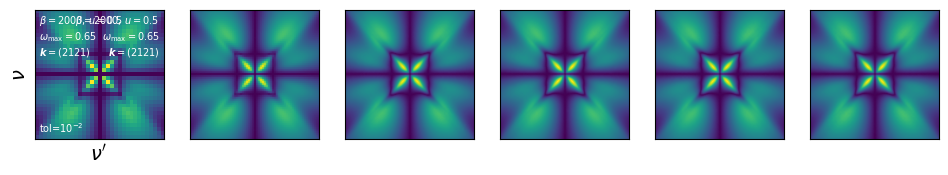

size(slice_act) = (256, 256)
size(slice_act) = (512, 512)
size(slice_act) = (1024, 1024)
size(slice_act) = (2048, 2048)
size(slice_act) = (4096, 4096)
size(slice_act) = (8192, 8192)


In [13]:
fig, axs = subplots(1, length(Rs); figsize=(PLOT_PAGE_INCH, PLOT_PAGE_INCH*3/5))

scfun(x::ComplexF64) = abs(x)
for i in 1:length(Rs)
    slice_act = slices[i] 
    Nq = div(size(slice_act,1),16)
    slice = 7*Nq:9*Nq
    @show size(slice_act)
    im = axs[i-1].imshow(scfun.(slice_act[slice,slice]))
    remove_ticks(axs[i-1])
end
axs[0].set_xlabel(L"\nu'")
axs[0].set_ylabel(L"\nu")
annotate_topleft(
    axs[0], L"\beta=2000,\,u=0.5"*"\n"*L"\omega_{\max}=0.65"*"\n"*L"\boldsymbol{k}=(2121)";
    color="white", fontsize=7
)
annotate_bottomleft(
    axs[0], L"tol=$10^{-2}$";
    color="white", fontsize=7
)
annotate_topright(
    axs[0], L"\beta=2000,\,u=0.5"*"\n"*L"\omega_{\max}=0.65"*"\n"*L"\boldsymbol{k}=(2121)";
    color="white", fontsize=7
)
# fig.tight_layout()
savefig("KeldyshRefine.pdf", dpi=500)
display(fig)

Illustrative plots

In [3]:
using Serialization
import QuanticsGrids as QG
# show improved resolution with increasing R
folder6 = joinpath(kcspath, "V_KF_bigbox_tol2_R1013")
folder2 = joinpath(kcspath, "V_KF_bigbox_iK2")
folder1 = joinpath(kcspath, "V_KF_bigbox_iK1")
folder10 = joinpath(kcspath, "V_KF_bigbox_iK10")
folderu1 = joinpath(kcspath, "V_KF_bigbox_tol2_u1.0")
folderu15 = joinpath(kcspath, "V_KF_bigbox_tol2_u1.5")
folderu3 = joinpath(kcspath, "V_KF_tol2_u3")
folderu5 = joinpath(kcspath, "V_KF_tol2_u5_beta2000")
# folder = joinpath(kcspath, "V_KF_bigbox_tol2_beta20")
# folder = joinpath(kcspath, "V_KF_bigbox_tol2_beta200")
# folder = joinpath(kcspath, "V_KF_bigbox_tol3_R1013")
# folder = joinpath(kcspath, "V_KF_pch_tol2_iK6_R0509")

R = 12

function slice_from_qtt(folder::AbstractString, R::Int)
    qtt_file = only(filter(f -> endswith(f, "R=$(R)_qtt.serialized"), readdir(folder))) 
    (tci, grid) = deserialize(joinpath(folder, qtt_file))
    return slice_from_qtt(tci, R)
end

function slice_from_qtt(tci, R::Int)
    Nhalf = 2^(R-1)
    transfer_offset = 0

    bit_pos = collect(1:3:3*R)
    bit_val = fill(0, R)
    QG.index_to_quantics_fused!(bit_val, (Nhalf+1+transfer_offset,))
    rm_val = [ifelse(bit_val[i]==1, collect(1:2:8), collect(2:2:8)) for i in 1:R]
    ttslice = TCI4Keldysh.project_legs(tci.sitetensors, collect(1:R), rm_val)
    @show size.(ttslice)
    slice_fat_q = TCI4Keldysh.qtt_to_fattensor(ttslice)
    slice_fat = TCI4Keldysh.qinterleaved_fattensor_to_regular(reshape(slice_fat_q, ntuple(_->2, 2*R)), R)
    @show size(slice_fat)
    return slice_fat
end

slices = [
    slice_from_qtt(folder6, R),
    slice_from_qtt(folder1, R),
    slice_from_qtt(folder2, R),
    slice_from_qtt(folder10, R),
];
slices_u = [
    slice_from_qtt(folderu1, R),
    slice_from_qtt(folderu15, R),
    slice_from_qtt(folderu3, R),
    slice_from_qtt(folderu5, R),
];

size.(ttslice) = [(1, 4, 8), (8, 4, 41), (41, 4, 111), (111, 4, 170), (170, 4, 203), (203, 4, 160), (160, 4, 69), (69, 4, 27), (27, 4, 12), (12, 4, 7), (7, 4, 4), (4, 4, 1)]
size(slice_fat) = (4096, 4096)
size.(ttslice) = [(1, 4, 8), (8, 4, 40), (40, 4, 66), (66, 4, 119), (119, 4, 154), (154, 4, 136), (136, 4, 42), (42, 4, 18), (18, 4, 8), (8, 4, 4), (4, 4, 3), (3, 4, 1)]
size(slice_fat) = (4096, 4096)
size.(ttslice) = [(1, 4, 8), (8, 4, 40), (40, 4, 89), (89, 4, 134), (134, 4, 173), (173, 4, 145), (145, 4, 60), (60, 4, 20), (20, 4, 9), (9, 4, 5), (5, 4, 3), (3, 4, 1)]
size(slice_fat) = (4096, 4096)
size.(ttslice) = [(1, 4, 8), (8, 4, 36), (36, 4, 80), (80, 4, 124), (124, 4, 146), (146, 4, 116), (116, 4, 45), (45, 4, 19), (19, 4, 10), (10, 4, 6), (6, 4, 3), (3, 4, 1)]
size(slice_fat) = (4096, 4096)
size.(ttslice) = [(1, 4, 8), (8, 4, 36), (36, 4, 67), (67, 4, 131), (131, 4, 216), (216, 4, 256), (256, 4, 202), (202, 4, 74), (74, 4, 24), (24, 4, 11), (11, 4, 6), (6, 4, 1)]
size(slice_fat

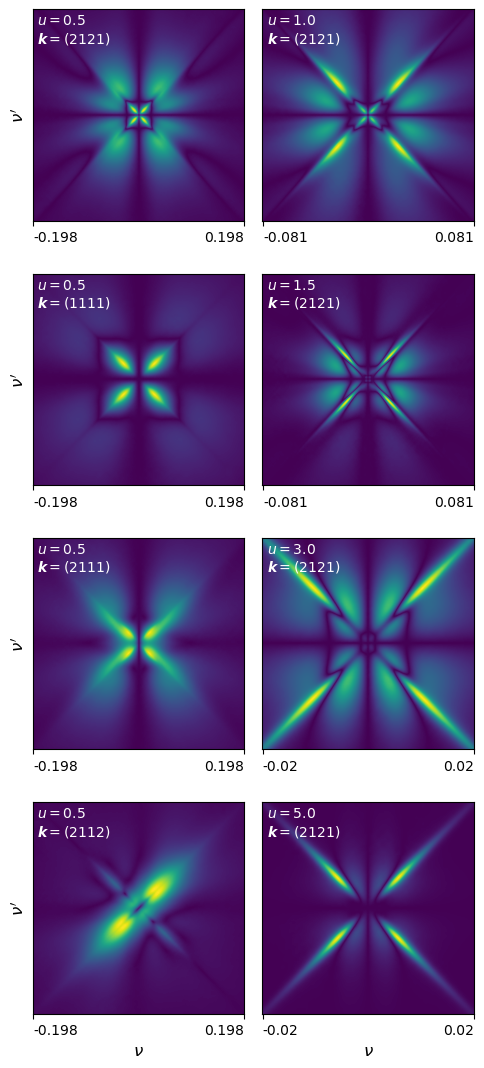

In [62]:
fig, axs = subplots(4,2; figsize=(5,11))

window = 2^11-2^10+400:2^11+2^10-400
u_windows = [
    2^11 - 2^8:2^11+2^8,
    2^11 - 2^8:2^11+2^8,
    2^11 - 2^9:2^11+2^9,
    2^11 - 2^10:2^11+2^10,
]
ommax_u = [
    0.65,
    0.65,
    0.65,
    0.08,
    0.04
]
vmin_iK = 0.0
vmax_iK = 0.005
ref = nothing
for i in eachindex(slices)
    # re = axs[i-1,0].imshow(abs.(slices[i][window, window]), vmin=vmin_iK, vmax=vmax_iK)
    re = axs[i-1,0].imshow(abs.(slices[i][window, window]))
    if i==1
        global ref = re 
    end
    im = axs[i-1,1].imshow(abs.(slices_u[i][u_windows[i], u_windows[i]]))
    # fig.colorbar(im, ax=axs[i-1,1], fraction=0.045)
    remove_ticks(axs[i-1,0])
    remove_ticks(axs[i-1,1])
end

# labels
for i in 0:3
    axs[i,0].set_ylabel(L"\nu'")
end
axs[3,0].set_xlabel(L"\nu")
axs[3,1].set_xlabel(L"\nu")

# ticks left
for i in 0:3
    axs[i,0].tick_params(
        axis="both",
        which="both",
        labelbottom=true,
        labelleft=false,
        bottom=true,
        left=false
    )
    # axs[i,0].set_yticks([1,length(window)])
    # axs[i,0].set_yticklabels([-0.65,0.65]; fontsize=10)
    # ticks = axs[i,0].yaxis.get_majorticklabels()
    # ticks[0].set_verticalalignment("top")
    # ticks[1].set_verticalalignment("bottom")
    # if i==3
    axs[i,0].set_xticks([1,length(window)])
    fac = length(window) / 2^R
    t = round(0.65*fac; digits=3)
    axs[i,0].set_xticklabels([-t,t]; fontsize=10)
    ticks = axs[i,0].xaxis.get_majorticklabels()
    ticks[0].set_horizontalalignment("left")
    ticks[1].set_horizontalalignment("right")
    # end
end
# ticks right
ranges = [0.65, 0.65, 0.08, 0.04]
for i in 0:3
    axs[i,1].tick_params(
        axis="both",
        which="both",
        labelbottom=true,
        labelleft=false,
        bottom=true,
        left=false
    )
    axs[i,1].set_xticks([1,length(u_windows[i+1])])
    fac = length(u_windows[i+1]) / 2^R
    t = round(ranges[i+1]*fac; digits=3)
    axs[i,1].set_xticklabels([-t,t]; fontsize=10)
    ticks = axs[i,1].xaxis.get_majorticklabels()
    ticks[0].set_horizontalalignment("left")
    ticks[1].set_horizontalalignment("right")
end

# fig.colorbar(ref, ax=axs[0:3,0], fraction=0.2)
# axs[0,1].set_title(L"\Im(\Gamma_{\mathrm{core}})")
annotate_topleft(axs[0,1], L"u=1.0" * "\n" * L"\boldsymbol{k}=(2121)", color="white", fontsize=10)
annotate_topleft(axs[1,1], L"u=1.5" * "\n" * L"\boldsymbol{k}=(2121)", color="white", fontsize=10)
annotate_topleft(axs[2,1], L"u=3.0" * "\n" * L"\boldsymbol{k}=(2121)", color="white", fontsize=10)
annotate_topleft(axs[3,1], L"u=5.0" * "\n" * L"\boldsymbol{k}=(2121)", color="white", fontsize=10)

annotate_topleft(axs[0,0], L"u=0.5" * "\n" * L"\boldsymbol{k}=(2121)", color="white", fontsize=10)
annotate_topleft(axs[1,0], L"u=0.5" * "\n" * L"\boldsymbol{k}=(1111)", color="white", fontsize=10)
annotate_topleft(axs[2,0], L"u=0.5" * "\n" * L"\boldsymbol{k}=(2111)", color="white", fontsize=10)
annotate_topleft(axs[3,0], L"u=0.5" * "\n" * L"\boldsymbol{k}=(2112)", color="white", fontsize=10)
fig.tight_layout()
savefig("V_KF_example.pdf"; dpi=500)
display(fig)


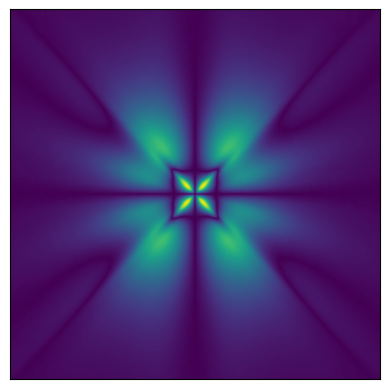

In [67]:
fig, ax = subplots()
ax.imshow(abs.(slices[1][window,window]))
ax.tick_params(
    axis="both",
    which="both",
    labelbottom=false,
    labelleft=false,
    bottom=false,
    left=false
)
savefig("V_KF_example_single.pdf")
display(fig)

In [75]:
TCI4Keldysh.KF_idx.([6,1,2,10],3)

4-element Vector{NTuple{4, Int64}}:
 (2, 1, 2, 1)
 (1, 1, 1, 1)
 (2, 1, 1, 1)
 (2, 1, 1, 2)

In [90]:
# quick look at vertex...
using HDF5
V_KF = h5read(joinpath(basepath,"V_KF_conventional","V_KF_p_R=8.h5"), "V_KF");

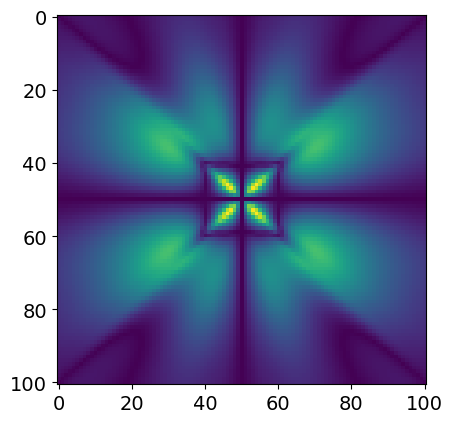

In [92]:
fig,ax = subplots()
scfun(x::ComplexF64) = abs(x)
ax.imshow(scfun.(V_KF[128,78:178,78:178,1,2,1,2]))
display(fig)

### Keldysh triptych

In [66]:
using HDF5
# Keldysh triptych data with slice_fat from cell above
iK = 6
ref = h5read(joinpath(basepath,"KFslice_beta2000","V_KF_dim1_slice512_R10_iK6.h5"), "V_KF")
ref2 = h5read(joinpath(basepath,"KFslice_u1.5","V_KF_dim1_slice512_R10_iK6.h5"), "V_KF")
# ref = V_KF[:,:,:,TCI4Keldysh.KF_idx(iK,3)...]
Nref = 2^10
@show size(ref)

size(ref) = (1024, 1024)


(1024, 1024)

In [67]:
using Serialization
import QuanticsGrids as QG

R = 10
Nhalf = 2^(R-1)
transfer_offset = 0
folder1 = joinpath(basepath, "KFslice_beta2000_TCI")
folder2 = joinpath(basepath, "KFslice_u1.5_TCI")

function get_qttslice(fd)
    qtt_file = only(filter(f -> endswith(f, "R=$(R)_qtt.serialized"), readdir(fd)))
    (tci, grid) = deserialize(joinpath(fd, qtt_file))

    bit_pos = collect(1:3:3*R)
    bit_val = fill(0, R)
    slice_idx = Nhalf+1+transfer_offset
    QG.index_to_quantics_fused!(bit_val, (slice_idx,))
    @show bit_val
    # ω=const
    rm_val = [ifelse(bit_val[i]==1, collect(1:2:8), collect(2:2:8)) for i in 1:R]
    # rm_val = [ifelse(bit_val[i]==1, collect(1:4), collect(5:8)) for i in 1:R]
    ttslice = TCI4Keldysh.project_legs(tci.sitetensors, collect(1:R), rm_val)
    @show size.(ttslice)
    slice_fat_q = TCI4Keldysh.qtt_to_fattensor(ttslice)
    slice_fat = TCI4Keldysh.qinterleaved_fattensor_to_regular(reshape(slice_fat_q, ntuple(_->2, 2*R)), R)
    @show size(slice_fat)
    return slice_fat
end

slice_fat1 = get_qttslice(folder1)
slice_fat2 = get_qttslice(folder2)
nothing

bit_val = [2, 1, 1, 1, 1, 1, 1, 1, 1, 1]
size.(ttslice) = [(1, 4, 8), (8, 4, 64), (64, 4, 189), (189, 4, 158), (158, 4, 67), (67, 4, 28), (28, 4, 12), (12, 4, 7), (7, 4, 4), (4, 4, 1)]
size(slice_fat) = (1024, 1024)
bit_val = [2, 1, 1, 1, 1, 1, 1, 1, 1, 1]
size.(ttslice) = [(1, 4, 8), (8, 4, 64), (64, 4, 216), (216, 4, 116), (116, 4, 40), (40, 4, 17), (17, 4, 8), (8, 4, 5), (5, 4, 3), (3, 4, 1)]
size(slice_fat) = (1024, 1024)


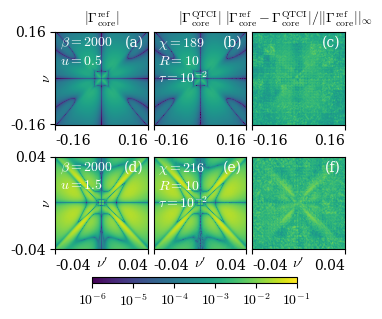

In [90]:
refslices = [ref, ref2]
slices = [slice_fat1, slice_fat2]
nrow = length(refslices)
fig, axs = subplots(nrow,3, figsize=(PLOT_COLUMN_INCH, PLOT_COLUMN_INCH/1.2), layout="compressed")
# looks horrible with fontsize=12
# fig, axs = subplots(nrow,3, figsize=(PLOT_COLUMN_INCH, PLOT_COLUMN_INCH*2/5), layout="compressed")

window = 1:2^R
tol = -2
global_cbar = true
fs = 10

labelpadx = -13
labelpady = -31
ticklabels1 = [-0.16,0.16]
ticklabels2 = [-0.04,0.04]
tickabels_all = [ticklabels1, ticklabels2]
# xticks = 1:Nhalf:2^R+1
vmin = -6
vmax = -1
xticks = [1,2^R+1]
for i in 0:length(refslices)-1

    refslice = refslices[i+1]
    slice_fat = slices[i+1]
    maxref = maximum(abs.(refslice))
    lmaxref = log10(maxref)
    diff = (refslice .- slice_fat[window,window]) ./ maxref

    # plot
    global image = axs[i,0].imshow((x -> log10(abs(x))).(refslice), cmap="viridis", interpolation="nearest", vmin=vmin, vmax=vmax)
    if !global_cbar
        image.set_clim(lmaxref+tol-1, lmaxref)
    end

    axs[i,0].set_ylabel(L"\nu"; labelpad=labelpady)
    axs[i,0].invert_yaxis()
    ticklabels = tickabels_all[i+1]
    axs[i,0].tick_params(axis="both", bottom=true, labelbottom=true, labelleft=true, left=true)
    if i==nrow-1
        axs[i,0].set_xlabel(L"\nu'"; labelpad=labelpadx)
        axs[i,0].set_xticks(xticks, labels=ticklabels)
        center_ticks(axs[i,0])
    else
        # axs[i,0].tick_params(axis="both", bottom=false, labelbottom=false, labelleft=true, left=true)
        axs[i,0].set_xticks(xticks, labels=ticklabels)
        center_ticks(axs[i,0])
    end
    axs[i,0].set_yticks(xticks, labels=ticklabels)
    if i==0
        # CHANGE MANUALLY
        annotate_topleft(axs[i,0], L"\beta=2000" * "\n" * L"u=0.5"; color="white", fontsize=10)
        annotate_topleft(axs[i,1], L"\chi=189" * "\n" * L"R=10" * "\n" * L"\tau=10^{-2}"; color="white", fontsize=10)
    elseif i==1
        annotate_topleft(axs[i,0], L"\beta=2000" * "\n" * L"u=1.5"; color="white", fontsize=10)
        annotate_topleft(axs[i,1], L"\chi=216" * "\n" * L"R=10" * "\n" * L"\tau=10^{-2}"; color="white", fontsize=10)
    end

    global image = axs[i,1].imshow((x -> log10(abs(x))).(slice_fat[window,window]), cmap="viridis", interpolation="nearest", vmin=vmin, vmax=vmax)
    if !global_cbar
        fig.colorbar(image, fraction=0.045, ax=axs[i,0:1], location="right")
    end
    if !global_cbar
        image.set_clim(lmaxref+tol-1, lmaxref)
    end
    axs[i,1].tick_params(axis="both", bottom=true, labelbottom=true, labelleft=false, left=false)
    if i==nrow-1
        axs[i,1].set_xlabel(L"\nu'"; labelpad=labelpadx)
        axs[i,1].set_xticks(xticks, labels=ticklabels)
        center_ticks(axs[i,1])
    else
        # axs[i,1].tick_params(axis="both", bottom=false, labelbottom=false, labelleft=false, left=false)
        axs[i,1].set_xticks(xticks, labels=ticklabels)
        center_ticks(axs[i,1])
    end

    im2 = axs[i,2].imshow((x -> log10(abs(x))).(diff), vmin=vmin, vmax=vmax)
    if !global_cbar
        fig.colorbar(im2, fraction=0.045, ax=axs[i,2], location="right")
    end
    (low,up) = im2.get_clim()
    if !global_cbar
        im2.set_clim(-8,up)
    end
    axs[i,2].tick_params(axis="both", bottom=true, labelbottom=true, labelleft=false, left=false)
    if i==nrow-1
        axs[i,2].set_xlabel(L"\nu'"; labelpad=labelpadx)
        axs[i,2].set_xticks(xticks, labels=ticklabels)
        center_ticks(axs[i,2])
    else
        axs[i,2].set_xticks(xticks, labels=ticklabels)
        center_ticks(axs[i,2])
    end

    if i==0
        axs[i,0].set_title(L"|\Gamma_{\mathrm{core}}^{\mathrm{ref}}|", fontsize=10)
        axs[i,1].set_title(L"|\Gamma_{\mathrm{core}}^{\mathrm{QTCI}}|", fontsize=10)
        axs[i,2].set_title(L"|\Gamma_{\mathrm{core}}^{\mathrm{ref}}-\Gamma_{\mathrm{core}}^{\mathrm{QTCI}}|/||\Gamma_{\mathrm{core}}^{\mathrm{ref}}||_\infty", fontsize=10)
    end

end

cbar_ax = fig.add_axes([0.25, 0.001, 0.6, 0.02])
cbar = fig.colorbar(image, cax=cbar_ax, orientation="horizontal")
cbar.set_ticks(ticks=-6:-1, labels=[L"10^{%$tt}" for tt in -6:-1])

abc_annotate(axs;color="white")
fig.get_layout_engine().set(w_pad=2 / 72, h_pad=1 / 72, hspace=0.01, wspace=0.01)
# fig.tight_layout()
savefig("KFvertex_triptych.pdf", dpi=500, bbox_inches="tight")
display(fig)
# @show maximum(abs.(diff))
# @show maximum(abs.(slice_fat))
# @show maximum(abs.(refslice))

In [ ]:
    fig.colorbar(im2, fraction=0.045, ax=axs[i,2], location="right")
    (low,up) = im2.get_clim()
    im2.set_clim(-8,up)
    if i==nrow-1
        axs[i,2].tick_params(axis="both", bottom=true, labelbottom=true, labelleft=false, left=false)
        axs[i,2].set_xlabel(L"\nu'"; labelpad=labelpadx)
        axs[i,2].set_xticks(xticks, labels=ticklabels)
        center_ticks(axs[i,2])
    else
        axs[i,2].tick_params(axis="both", bottom=false, labelbottom=false, labelleft=false, left=false)
    end

    if i==0
        axs[i,0].set_title(L"\log_{10}|\Gamma^{\mathrm{ref}}|", fontsize=12)
        axs[i,1].set_title(L"\log_{10}|\Gamma^{\mathrm{QTCI}}|", fontsize=12)
        axs[i,2].set_title(L"\log_{10}\left(|\Gamma^{\mathrm{ref}}-\Gamma^{\mathrm{QTCI}}|/|\Gamma^{\mathrm{ref}}|_\infty\right)", fontsize=12)
    end

end

abc_annotate(axs;color="white")
# fig.tight_layout()
savefig("KFvertex_triptych.pdf", dpi=500)
display(fig)
# @show maximum(abs.(diff))
# @show maximum(abs.(slice_fat))
# @show maximum(abs.(refslice))

In [ ]:
w-1
        axs[i,0].tick_params(axis="both", bottom=true, labelbottom=true, labelleft=true, left=true)
        axs[i,0].set_xlabel(L"\nu'"; labelpad=labelpadx)
        @show collect(xticks)
        axs[i,0].set_xticks(xticks, labels=ticklabels)
        center_ticks(axs[i,0])
    else
        axs[i,0].tick_params(axis="both", bottom=false, labelbottom=false, labelleft=true, left=true)
    end
    axs[i,0].set_yticks(xticks, labels=ticklabels)
    if i==0
        # CHANGE MANUALLY
        annotate_topleft(axs[i,0], L"\beta=2000" * "\n" * L"u=0.5"; color="white", fontsize=10)
        annotate_topleft(axs[i,1], L"\chi=189"; color="white", fontsize=10)
    elseif i==1
        annotate_topleft(axs[i,0], L"\beta=2000" * "\n" * L"u=1.5"; color="white", fontsize=10)
        annotate_topleft(axs[i,1], L"\chi=216" * "\n" * L"R=10" * "\n" * L"\tau=10^{-2}"; color="white", fontsize=10)
    end

    im = axs[i,1].imshow((x -> log10(abs(x))).(slice_fat[window,window]), cmap="viridis", interpolation="nearest")
    fig.colorbar(im, fraction=0.045, ax=axs[i,0:1], location="right")
    im.set_clim(lmaxref+tol-1, lmaxref)
    axs[i,1].tick_params(axis="both", bottom=true, labelbottom=true, labelleft=false, left=false)
    if i==nrow-1
        axs[i,1].set_xlabel(L"\nu'")
        axs[i,1].set_xticks(xticks, labels=ticklabels)
        center_ticks(axs[i,1])
    else
        axs[i,1].tick_params(axis="both", bottom=false, labelbottom=false, labelleft=false, left=false)
    end

    im2 = axs[i,2].imshow((x -> log10(abs(x))).(diff))
    fig.colorbar(im2, fraction=0.045, ax=axs[i,2], location="right")
    (low,up) = im2.get_clim()
    im2.set_clim(-8,up)
    if i==nrow-1
        axs[i,2].tick_params(axis="both", bottom=true, labelbottom=true, labelleft=false, left=false)
        axs[i,2].set_xlabel(L"\nu'")
        axs[i,2].set_xticks(xticks, labels=ticklabels)
        center_ticks(axs[i,2])
    else
        axs[i,2].tick_params(axis="both", bottom=false, labelbottom=false, labelleft=false, left=false)
    end

    if i==0
        axs[i,0].set_title(L"\log_{10}|\Gamma^{\mathrm{ref}}|", fontsize=12)
        axs[i,1].set_title(L"\log_{10}|\Gamma^{\mathrm{QTCI}}|", fontsize=12)
        axs[i,2].set_title(L"\log_{10}\left(|\Gamma^{\mathrm{ref}}-\Gamma^{\mathrm{QTCI}}|/|\Gamma^{\mathrm{ref}}|_\infty\right)", fontsize=12)
    end

end

abc_annotate(axs;color="white")
# fig.tight_layout()
savefig("KFvertex_triptych.pdf", dpi=500)
display(fig)
# @show maximum(abs.(diff))
# @show maximum(abs.(slice_fat))
# @show maximum(abs.(refslice))

#### Further dependence (MF+KF)

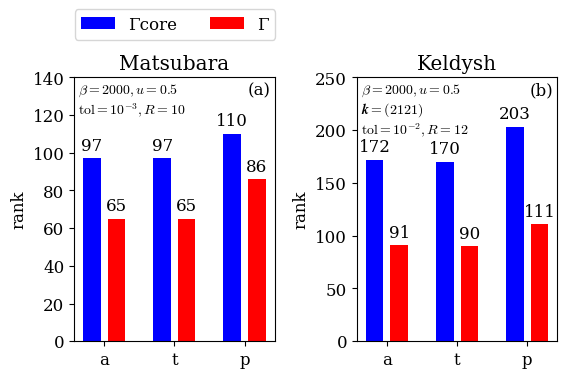

In [249]:
# channel dependence: Keldysh and Matsubara; three channels; correlator, core and full vertex

fig, axs = subplots(1, 2, figsize=(PLOT_COLUMN_INCH,  0.6PLOT_COLUMN_INCH))
set_rcParams(12)

R = 10
# Matsubara

# corr = Int[]
# folder = joinpath(basepath, "corrMF_ach")
# push!(corr, Rrank(folder, R))
# folder = joinpath(basepath, "corrMF_tch")
# push!(corr, Rrank(folder, R))
# folder = joinpath(basepath, "corrMF_pch_tol3_beta2000")
# push!(corr, Rrank(folder, R))


V_ranks = Int[]
folder = joinpath(basepath, "gamcoreMF_ach_tol3_beta2000_R10")
push!(V_ranks, Rrank(folder, R))
folder = joinpath(basepath, "gamcoreMF_tch_tol3_beta2000_R10")
push!(V_ranks, Rrank(folder, R))
folder = joinpath(basepath, "gamcoreMF_pch_tol3_beta2000")
push!(V_ranks, Rrank(folder, R))

Vfull_ranks = Int[]
folder = joinpath(basepath, "fullvertex_MF_ach_tol3")
push!(Vfull_ranks, Rrank(folder, R))
folder = joinpath(basepath, "fullvertex_MF_tch_tol3")
push!(Vfull_ranks, Rrank(folder, R))
folder = joinpath(basepath, "fullvertexMF_pch_tol3_beta2000")
push!(Vfull_ranks, Rrank(folder, R))

# Keldysh
V_ranks_KF = Int[]
folder = joinpath(kcspath, "V_KF_bigbox_ach")
push!(V_ranks_KF, Rrank(folder, 12))
folder = joinpath(kcspath, "V_KF_bigbox_tch")
push!(V_ranks_KF, Rrank(folder, 12))
folder = joinpath(kcspath, "V_KF_bigbox_tol2_R1013")
push!(V_ranks_KF, Rrank(folder, 12))

# TODO
Vfull_ranks_KF = Int[]
folder = joinpath(kcspath, "V_KF_full_bigbox_ach")
push!(Vfull_ranks_KF, Rrank(folder, 12))
folder = joinpath(kcspath, "V_KF_full_bigbox_tch")
push!(Vfull_ranks_KF, Rrank(folder, 12))
folder = joinpath(kcspath, "V_KF_full_bigbox_pch")
push!(Vfull_ranks_KF, Rrank(folder, 12))


# plot
channels = ["a", "t", "p"]
barw = 0.25
cc = 0
x = collect(Base.OneTo(length(channels)))

data = [V_ranks, Vfull_ranks]
labels = ["Γcore", "Γ"]
colors = ["blue", "red"]
# labels = ["one", "two", "three"]
handles = []
for (ic, c) in enumerate(labels)
    offset = (ic==1) ? +0.3*barw : 1.7*barw
    rects = axs[0].bar(x .+ offset, data[ic], barw, label=labels[ic], color=colors[ic])
    axs[0].bar_label(rects, padding=3, fontsize=12)
    push!(handles, rects)
    cc += 1
end

data_KF = [V_ranks_KF, Vfull_ranks_KF]
for (ic, c) in enumerate(labels)
    offset = (ic==1) ? +0.30*barw : 1.70*barw
    rects = axs[1].bar(x .+ offset, data_KF[ic], barw, label=labels[ic], color=colors[ic])
    axs[1].bar_label(rects, padding=3, fontsize=12)
    cc += 1
end


axs[0].set_title("Matsubara")
axs[1].set_title("Keldysh")
axs[0].set_ylabel("rank")
axs[1].set_ylabel("rank")
axs[0].set_xticks(x .+ barw, channels)
axs[1].set_xticks(x .+ barw, channels)
# axs[0].legend(loc="upper left", ncols=3)
axs[0].set_ylim(0, 140)
axs[1].set_ylim(0, 250)
abc_annotate(axs)

annotate_topleft(axs[0], L"\beta=2000, u=0.5" * "\n" * L"\mathrm{tol}=10^{-3}, R=10"; fontsize=10)
annotate_topleft(axs[1], L"\beta=2000, u=0.5" * "\n" * L"\boldsymbol{k}=(2121)" * "\n" * L"\mathrm{tol}=10^{-2}, R=12"; fontsize=10)

lgd = fig.legend(handles=handles, ncols=3, bbox_to_anchor=(0.50,1.10))
fig.tight_layout()
save_bbox(
    "channel_comparison.pdf",
    fig,
    lgd
)
display(fig)

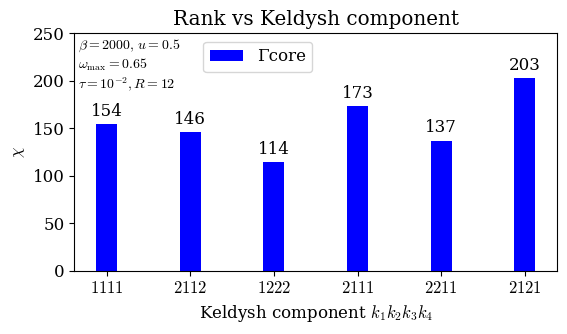

In [280]:
# Keldysh component dependence
set_rcParams(12)

R = 12
iKlist = [1,10,15,2,4,6]
iKtuples = TCI4Keldysh.KF_idx.(iKlist, 3)
Rs = Int[]
for iK in iKlist[1:end-1]
    push!(Rs, Rrank(joinpath(kcspath, "V_KF_bigbox_iK$(iK)"), R))
end
push!(Rs, Rrank(joinpath(kcspath, "V_KF_bigbox_tol2_R1013"), R))

# plot
fig, axs = subplots(;figsize=(PLOT_COLUMN_INCH, 0.6*PLOT_COLUMN_INCH))
annotate_topleft(axs, L"\beta=2000,\,u=0.5" *"\n" * L"\omega_{\max}=0.65" * "\n" * L"\tau=10^{-2}, R=12"; color="black", fontsize=10)

barw = 0.25
x = collect(Base.OneTo(length(iKlist)))
to_label(ik::NTuple{4,Int}) = round(Int, ik[1]*1e3 + ik[2]*1e2 + ik[3]*10 + ik[4])
ticklabels = [L"%$(to_label(iKtuples[i]))" for i in eachindex(iKtuples)]
labels = ["Γcore"]
colors = ["blue"]
handles = []
rects = axs.bar(x, Rs, barw, tick_label=ticklabels, label=labels[1], color=colors[1])
axs.bar_label(rects, padding=3, fontsize=12)
axs.set_ylim(0,250)
axs.set_xlabel(L"Keldysh component $k_1k_2k_3k_4$")
axs.set_ylabel(L"\chi")
axs.set_title("Rank vs Keldysh component")
push!(handles, rects)
axs.legend(;bbox_to_anchor=(0.25,1.0), fontsize=12)

fig.tight_layout()
savefig("ranks_vs_iK.pdf")
display(fig)

In [95]:
# flavor dependence

    # MATSUBARA
core_upup = joinpath(basepath, "gamcoreMF_pch_tol3_beta2000")
core_updown = joinpath(basepath, "gamcoreMF_pch_tol3_beta2000_updown")
full_upup = joinpath(basepath, "fullvertexMF_pch_tol3_beta2000")
full_updown = joinpath(basepath, "matsubarafull_updown")

    # KELDYSH
core_updown_KF = joinpath(kcspath, "V_KF_bigbox_tol2_updown_R1013")
core_upup_KF = joinpath(kcspath, "V_KF_bigbox_tol2_R1013")
full_upup_KF = joinpath(kcspath, "V_KF_full_bigbox_pch")
full_updown_KF = joinpath(kcspath, "V_KF_full_bigbox_updown")

"/scratch/m/M.Frankenbach/tci4keldysh/cluster_output_KCS/V_KF_full_bigbox_updown"

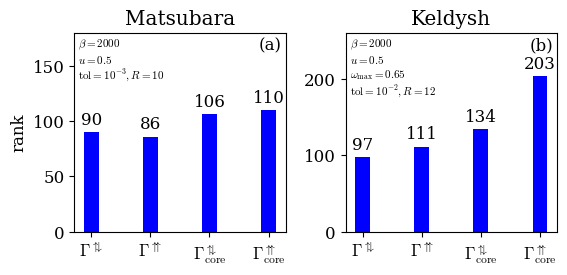

In [97]:
# Keldysh component dependence
set_rcParams(12)

# plot
fig, axs = subplots(1,2;figsize=(PLOT_COLUMN_INCH_OLD, 0.5*PLOT_COLUMN_INCH_OLD))
annotate_topleft(axs[0], L"\beta=2000" * "\n" * L"u=0.5" *"\n" * L"\mathrm{tol}=10^{-3}, R=10"; color="black", fontsize=8)
annotate_topleft(axs[1], L"\beta=2000" * "\n" * L"u=0.5" *"\n" * L"\omega_{\max}=0.65" * "\n" * L"\mathrm{tol}=10^{-2}, R=12"; color="black", fontsize=8)

# Matsubara
RM = 10
barw = 0.25
x = collect(1:4)
ticklabels = [L"\Gamma_{\mathrm{core}}^{\uparrow\!\!\!\!\uparrow}",
    L"\Gamma_{\mathrm{core}}^{\uparrow\!\!\!\!\downarrow}",
    L"\Gamma^{\uparrow\!\!\!\!\uparrow}",
    L"\Gamma^{\uparrow\!\!\!\!\downarrow}"
    ]
labels = ["Γcore"]
colors = ["blue"]
handles = []
ranks = [Rrank(core_upup, 10), Rrank(core_updown, 10), Rrank(full_upup, 10), Rrank(full_updown, 10)]
rects = axs[0].bar(x, reverse(ranks), barw, tick_label=reverse(ticklabels), label=labels[1], color=colors[1])
axs[0].bar_label(rects, padding=3, fontsize=12)
axs[0].set_ylim(0,180)
# axs[0].set_xlabel(L"Keldysh component $k_1k_2k_3k_4$")
axs[0].set_ylabel("rank")
axs[0].set_title("Matsubara")
push!(handles, rects)

# Keldysh
barw = 0.25
x = collect(1:4)
ticklabels = [L"\Gamma_{\mathrm{core}}^{\uparrow\!\!\!\!\uparrow}",
    L"\Gamma_{\mathrm{core}}^{\uparrow\!\!\!\!\downarrow}",
    L"\Gamma^{\uparrow\!\!\!\!\uparrow}",
    L"\Gamma^{\uparrow\!\!\!\!\downarrow}"
    ]
labels = ["Γcore"]
colors = ["blue"]
handles = []
ranks = [Rrank(core_upup_KF, 12), Rrank(core_updown_KF, 12), Rrank(full_upup_KF, 12), Rrank(full_updown_KF, 12)]
rects = axs[1].bar(x, reverse(ranks), barw, tick_label=reverse(ticklabels), label=labels[1], color=colors[1])
axs[1].bar_label(rects, padding=3, fontsize=12)
axs[1].set_ylim(0,260)
# axs[1].set_xlabel(L"Keldysh component $k_1k_2k_3k_4$")
axs[1].set_title("Keldysh")
push!(handles, rects)
abc_annotate(axs)


fig.tight_layout()
savefig("ranks_vs_flavor.pdf")
display(fig)

Combine flavor and channel comparison in one figure

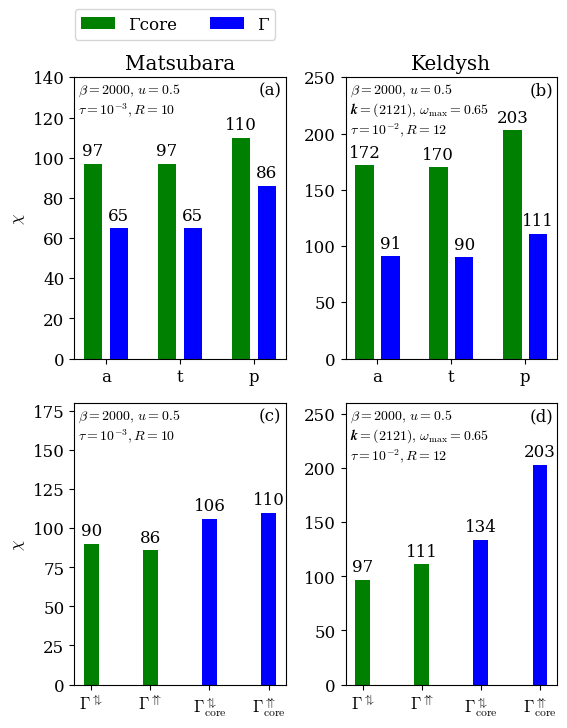

In [102]:

# channel dependence: Keldysh and Matsubara; three channels; correlator, core and full vertex

fig, axs = subplots(2, 2, figsize=(PLOT_COLUMN_INCH_OLD,  1.2*PLOT_COLUMN_INCH_OLD))
set_rcParams(12)

R = 10
# Matsubara

# corr = Int[]
# folder = joinpath(basepath, "corrMF_ach")
# push!(corr, Rrank(folder, R))
# folder = joinpath(basepath, "corrMF_tch")
# push!(corr, Rrank(folder, R))
# folder = joinpath(basepath, "corrMF_pch_tol3_beta2000")
# push!(corr, Rrank(folder, R))


V_ranks = Int[]
folder = joinpath(basepath, "gamcoreMF_ach_tol3_beta2000_R10")
push!(V_ranks, Rrank(folder, R))
folder = joinpath(basepath, "gamcoreMF_tch_tol3_beta2000_R10")
push!(V_ranks, Rrank(folder, R))
folder = joinpath(basepath, "gamcoreMF_pch_tol3_beta2000")
push!(V_ranks, Rrank(folder, R))

Vfull_ranks = Int[]
folder = joinpath(basepath, "fullvertex_MF_ach_tol3")
push!(Vfull_ranks, Rrank(folder, R))
folder = joinpath(basepath, "fullvertex_MF_tch_tol3")
push!(Vfull_ranks, Rrank(folder, R))
folder = joinpath(basepath, "fullvertexMF_pch_tol3_beta2000")
push!(Vfull_ranks, Rrank(folder, R))

# Keldysh
V_ranks_KF = Int[]
folder = joinpath(kcspath, "V_KF_bigbox_ach")
push!(V_ranks_KF, Rrank(folder, 12))
folder = joinpath(kcspath, "V_KF_bigbox_tch")
push!(V_ranks_KF, Rrank(folder, 12))
folder = joinpath(kcspath, "V_KF_bigbox_tol2_R1013")
push!(V_ranks_KF, Rrank(folder, 12))

# TODO
Vfull_ranks_KF = Int[]
folder = joinpath(kcspath, "V_KF_full_bigbox_ach")
push!(Vfull_ranks_KF, Rrank(folder, 12))
folder = joinpath(kcspath, "V_KF_full_bigbox_tch")
push!(Vfull_ranks_KF, Rrank(folder, 12))
folder = joinpath(kcspath, "V_KF_full_bigbox_pch")
push!(Vfull_ranks_KF, Rrank(folder, 12))


# plot
channels = ["a", "t", "p"]
barw = 0.25
cc = 0
x = collect(Base.OneTo(length(channels)))

data = [V_ranks, Vfull_ranks]
labels = ["Γcore", "Γ"]
colors = ["green", "blue"]
# labels = ["one", "two", "three"]
handles_top = []
for (ic, c) in enumerate(labels)
    offset = (ic==1) ? +0.3*barw : 1.7*barw
    rects = axs[0,0].bar(x .+ offset, data[ic], barw, label=labels[ic], color=colors[ic])
    axs[0,0].bar_label(rects, padding=3, fontsize=12)
    push!(handles_top, rects)
    cc += 1
end

data_KF = [V_ranks_KF, Vfull_ranks_KF]
for (ic, c) in enumerate(labels)
    offset = (ic==1) ? +0.30*barw : 1.70*barw
    rects = axs[0,1].bar(x .+ offset, data_KF[ic], barw, label=labels[ic], color=colors[ic])
    axs[0,1].bar_label(rects, padding=3, fontsize=12)
    cc += 1
end


axs[0,0].set_title("Matsubara")
axs[0,1].set_title("Keldysh")
axs[0,0].set_ylabel(L"\chi")
axs[0,0].set_xticks(x .+ barw, channels)
axs[0,1].set_xticks(x .+ barw, channels)
# axs[0,0].legend(loc="upper left", ncols=3)
axs[0,0].set_ylim(0, 140)
axs[0,1].set_ylim(0, 250)

# LOWER ROW

# plot
annotate_topleft(axs[1,0], L"\beta=2000,\,u=0.5" *"\n" * L"\tau=10^{-3}, R=10"; color="black", fontsize=10)
annotate_topleft(axs[1,1], L"\beta=2000,\,u=0.5" * "\n" * L"\boldsymbol{k}=(2121),\,\omega_{\max}=0.65" * "\n" * L"\tau=10^{-2}, R=12"; fontsize=10)

# Matsubara
RM = 10
barw = 0.25
x = collect(1:4)
ticklabels = [L"\Gamma_{\mathrm{core}}^{\uparrow\!\!\!\!\uparrow}",
    L"\Gamma_{\mathrm{core}}^{\uparrow\!\!\!\!\downarrow}",
    L"\Gamma^{\uparrow\!\!\!\!\uparrow}",
    L"\Gamma^{\uparrow\!\!\!\!\downarrow}"
    ]
labels = ["Γcore"]
handles = []
ranks = [Rrank(core_upup, 10), Rrank(core_updown, 10), Rrank(full_upup, 10), Rrank(full_updown, 10)]
rects = axs[1,0].bar(x, reverse(ranks), barw, tick_label=reverse(ticklabels), label=labels[1], color=[colors[1], colors[1], colors[2], colors[2]])
axs[1,0].bar_label(rects, padding=3, fontsize=12)
axs[1,0].set_ylim(0,180)
# axs[1,0].set_xlabel(L"Keldysh component $k_1k_2k_3k_4$")
axs[1,0].set_ylabel(L"\chi")
push!(handles, rects)

# Keldysh
barw = 0.25
x = collect(1:4)
ticklabels = [L"\Gamma_{\mathrm{core}}^{\uparrow\!\!\!\!\uparrow}",
    L"\Gamma_{\mathrm{core}}^{\uparrow\!\!\!\!\downarrow}",
    L"\Gamma^{\uparrow\!\!\!\!\uparrow}",
    L"\Gamma^{\uparrow\!\!\!\!\downarrow}"
    ]
labels = ["Γcore"]
handles = []
ranks = [Rrank(core_upup_KF, 12), Rrank(core_updown_KF, 12), Rrank(full_upup_KF, 12), Rrank(full_updown_KF, 12)]
rects = axs[1,1].bar(x, reverse(ranks), barw, tick_label=reverse(ticklabels), label=labels[1], color=[colors[1], colors[1], colors[2], colors[2]])
axs[1,1].bar_label(rects, padding=3, fontsize=12)
axs[1,1].set_ylim(0,260)
# axs[1,1].set_xlabel(L"Keldysh component $k_1k_2k_3k_4$")


abc_annotate(axs)
annotate_topleft(axs[0,0], L"\beta=2000,\,u=0.5" * "\n" * L"\tau=10^{-3}, R=10"; fontsize=10)
annotate_topleft(axs[0,1], L"\beta=2000,\,u=0.5" * "\n" * L"\boldsymbol{k}=(2121),\,\omega_{\max}=0.65" * "\n" * L"\tau=10^{-2}, R=12"; fontsize=10)

lgd = fig.legend(handles=handles_top, ncols=3, bbox_to_anchor=(0.50,1.05))
fig.tight_layout()
save_bbox(
    "ranks_vs_flavorchannel.pdf",
    fig,
    lgd
)
display(fig)

Plot some PSFs

In [ ]:
basepath = joinpath(TCI4Keldysh.datadir(), "SIAM_u=0.50")
PSFpath = joinpath(basepath, "PSF_nz=4_conn_zavg/4pt")
T = TCI4Keldysh.dir_to_T(PSFpath)
G = TCI4Keldysh.FullCorrelator_MF(PSFpath, ["F1","F1dag","F3","F3dag"];
    T=T, flavor_idx=1, ωs_ext=TCI4Keldysh.MF_npoint_grid(T,5,3), ωconvMat=TCI4Keldysh.channel_trafo("t")
    )
Adiscs = [G.Gps[i].tucker.center for i in eachindex(G.Gps)];

24-element Vector{Array{ComplexF64, 3}}:
 [0.0 + 0.0im 0.0 + 0.0im … 0.0 + 0.0im 0.0 + 0.0im; 0.0 + 0.0im 0.0 + 0.0im … 0.0 + 0.0im 0.0 + 0.0im; … ; 0.0 + 0.0im 0.0 + 0.0im … 0.0 + 0.0im 0.0 + 0.0im; 0.0 + 0.0im 0.0 + 0.0im … 0.0 + 0.0im 0.0 + 0.0im;;; 0.0 + 0.0im 0.0 + 0.0im … 0.0 + 0.0im 0.0 + 0.0im; 0.0 + 0.0im 0.0 + 0.0im … 0.0 + 0.0im 0.0 + 0.0im; … ; 0.0 + 0.0im 0.0 + 0.0im … 0.0 + 0.0im 0.0 + 0.0im; 0.0 + 0.0im 0.0 + 0.0im … 0.0 + 0.0im 0.0 + 0.0im;;; 0.0 + 0.0im 0.0 + 0.0im … 0.0 + 0.0im 0.0 + 0.0im; 0.0 + 0.0im 0.0 + 0.0im … 0.0 + 0.0im 0.0 + 0.0im; … ; 0.0 + 0.0im 0.0 + 0.0im … 0.0 + 0.0im 0.0 + 0.0im; 0.0 + 0.0im 0.0 + 0.0im … 0.0 + 0.0im 0.0 + 0.0im;;; … ;;; 0.0 + 0.0im 0.0 + 0.0im … 0.0 + 0.0im 0.0 + 0.0im; 0.0 + 0.0im 0.0 + 0.0im … 0.0 + 0.0im 0.0 + 0.0im; … ; 0.0 + 0.0im 0.0 + 0.0im … 0.0 + 0.0im 0.0 + 0.0im; 0.0 + 0.0im 0.0 + 0.0im … 0.0 + 0.0im 0.0 + 0.0im;;; 0.0 + 0.0im 0.0 + 0.0im … 0.0 + 0.0im 0.0 + 0.0im; 0.0 + 0.0im 0.0 + 0.0im … 0.0 + 0.0im 0.0 + 0.0im; … ; 0.0 +

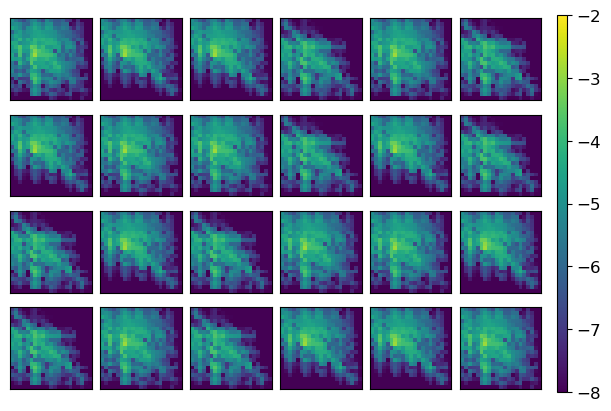

maximum.([abs.(A) for A = Adiscs]) = [0.0013528889162558086, 0.0013076512933948106, 0.0005107120553215944, 0.0005107120553215944, 0.0013076512933948106, 0.0013528889162558086, 0.001307083433345431, 0.0013530002730900645, 0.001307083433345431, 0.0013530002730900645, 0.0005115543634463145, 0.0005115543634463145, 0.0005107120553215944, 0.0005107120553215944, 0.0013528889162558086, 0.0013076512933948106, 0.0013528889162558086, 0.0013076512933948106, 0.0013530002730900645, 0.001307083433345431, 0.0005115543634463145, 0.0005115543634463145, 0.001307083433345431, 0.0013530002730900645]


In [59]:
am = argmax.([abs.(A) for A in Adiscs])
@show maximum.([abs.(A) for A in Adiscs])

set_rcParams(12)
window = (70:90, 70:90)
fig, axs = subplots(4,6; figsize=(6,4), constrained_layout=true)
im = nothing
for i in 0:3
    for j in 0:5
        id = j*4 + i + 1
        global im = axs[i,j].imshow(log10.(abs.(Adiscs[id][76,window...]));clim=(-8,-2))
        remove_ticks(axs[i,j])
    end
end
fig.colorbar(im, ax=axs, orientation="vertical", fraction=0.08, pad=0.03, aspect=40)

# fig.tight_layout()
savefig("Adisc_example.pdf")
display(fig)